In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [5]:
import pandas as pd

In [7]:
df=pd.read_csv("nasa.csv")

In [9]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Neo Reference ID


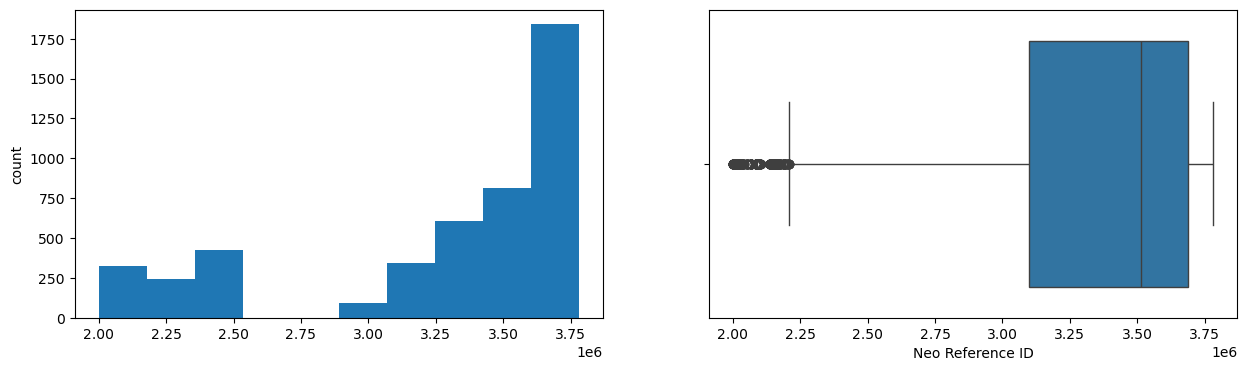

Name


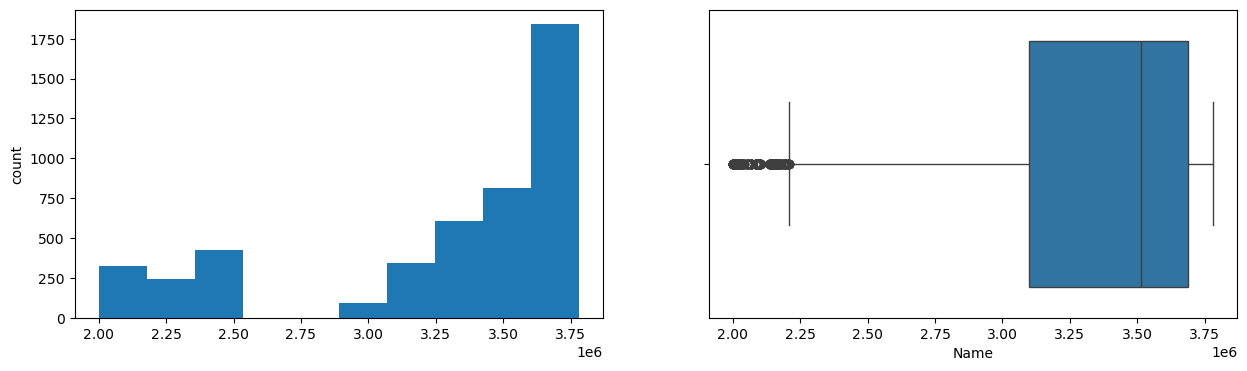

Absolute Magnitude


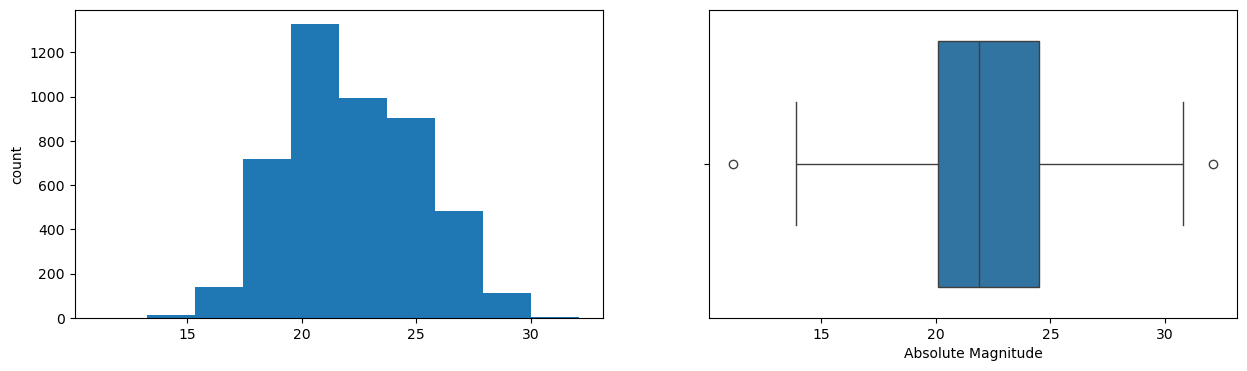

Est Dia in KM(min)


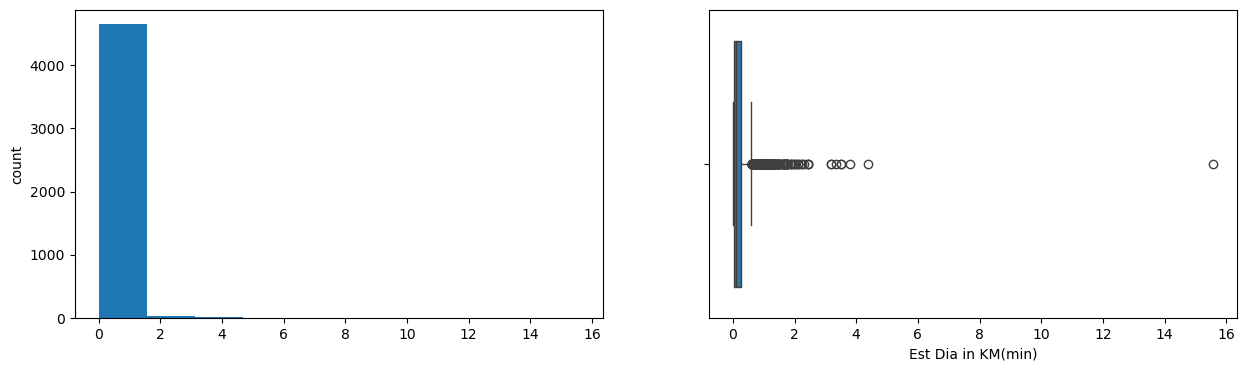

Est Dia in KM(max)


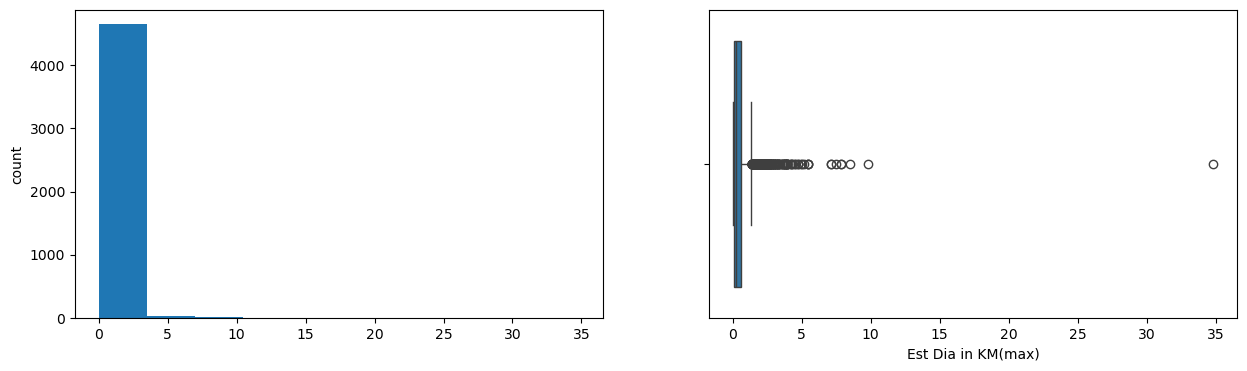

Est Dia in M(min)


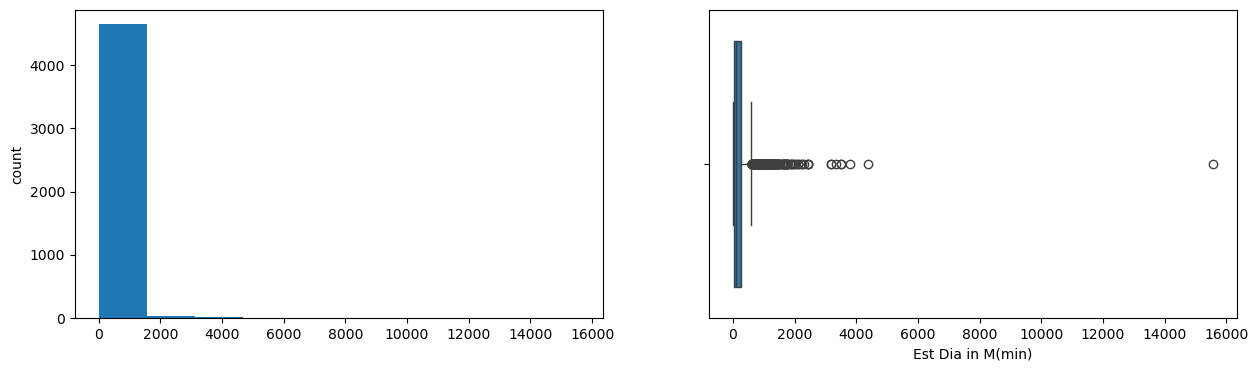

Est Dia in M(max)


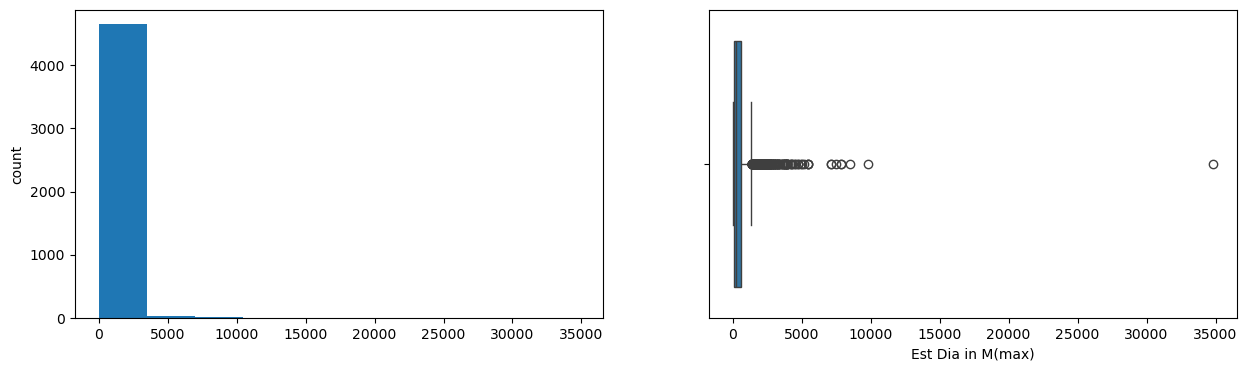

Est Dia in Miles(min)


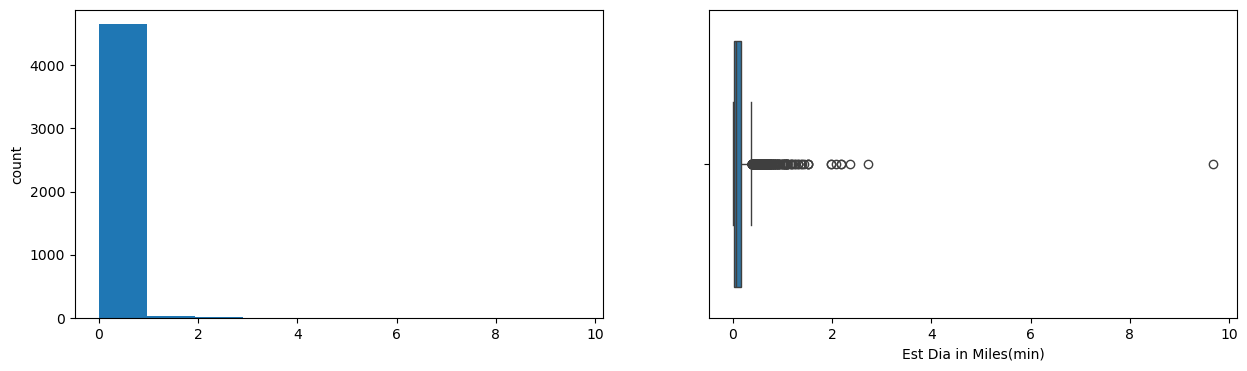

Est Dia in Miles(max)


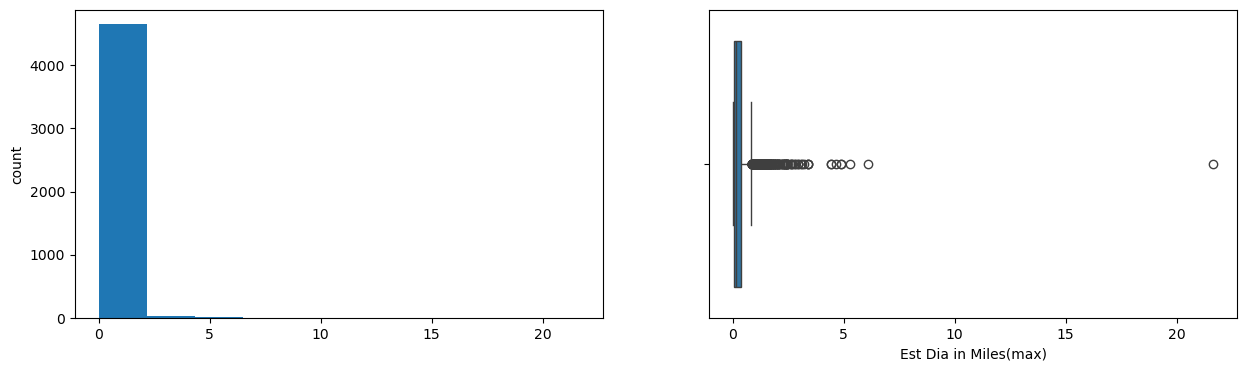

Est Dia in Feet(min)


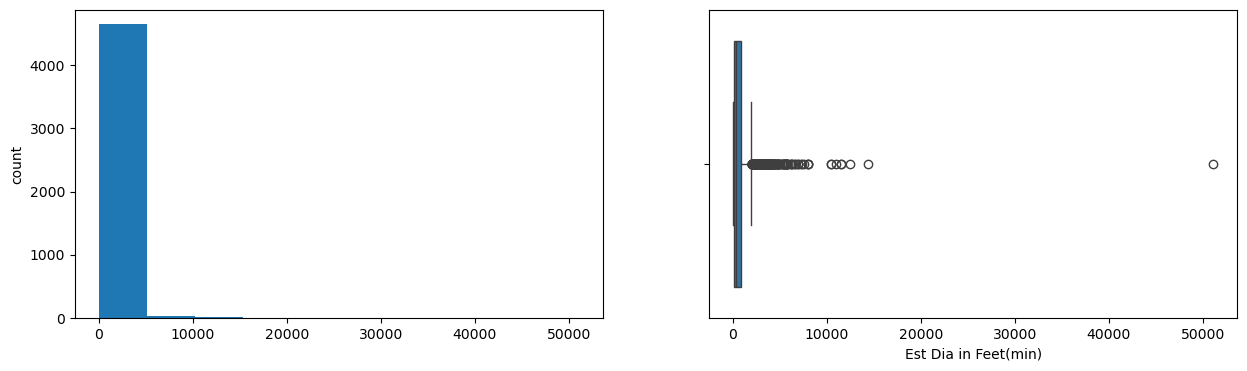

Est Dia in Feet(max)


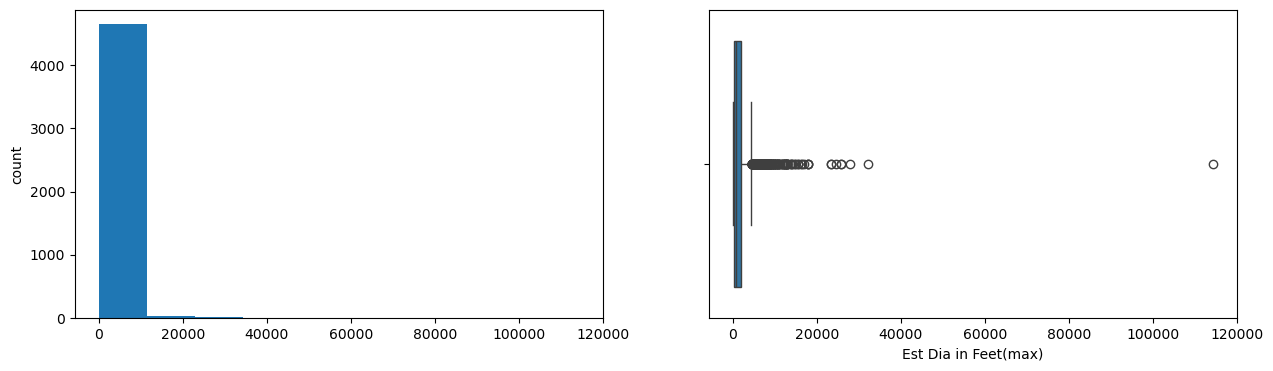

Close Approach Date


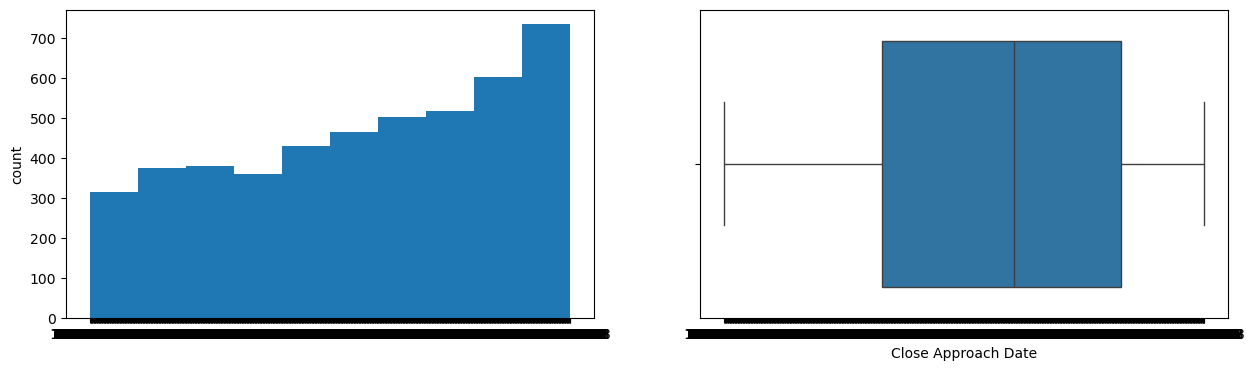

Epoch Date Close Approach


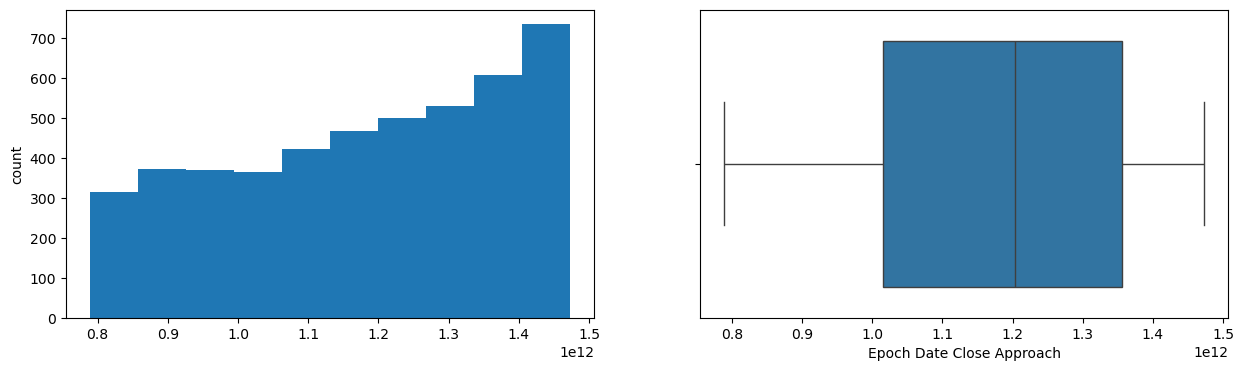

Relative Velocity km per sec


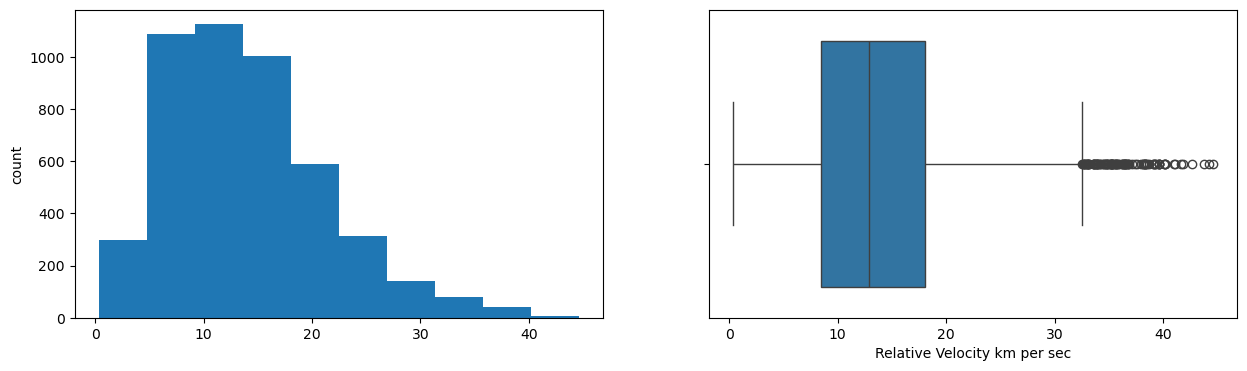

Relative Velocity km per hr


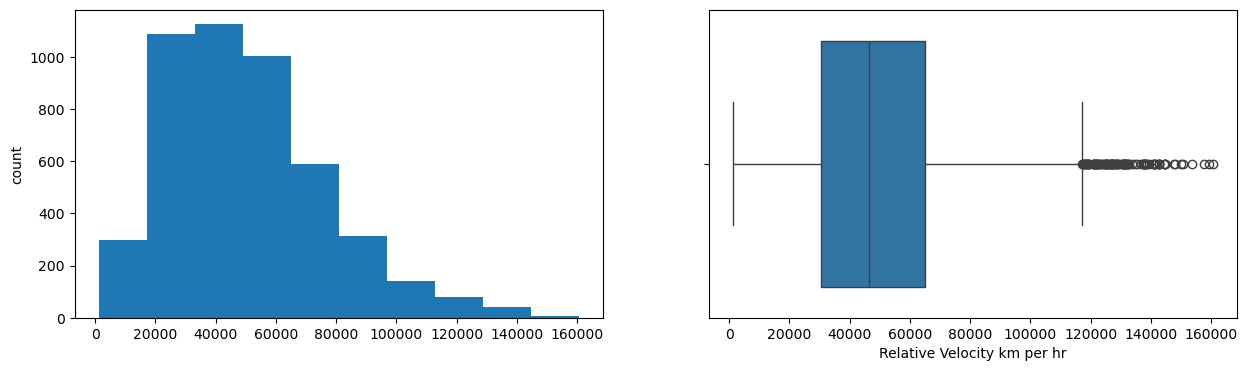

Miles per hour


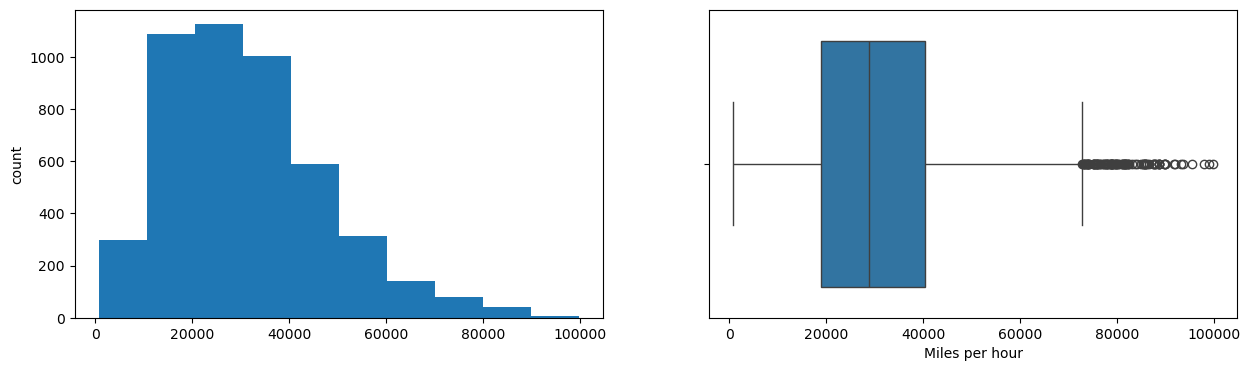

Miss Dist.(Astronomical)


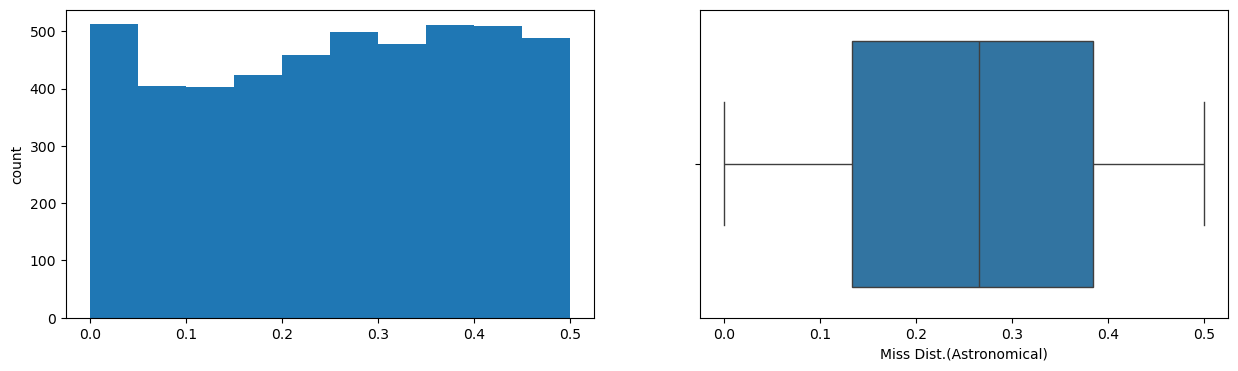

Miss Dist.(lunar)


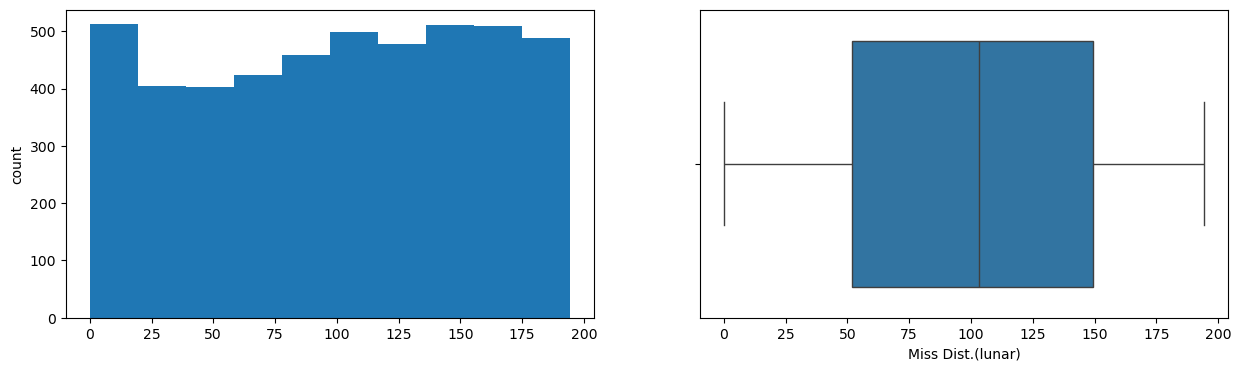

Miss Dist.(kilometers)


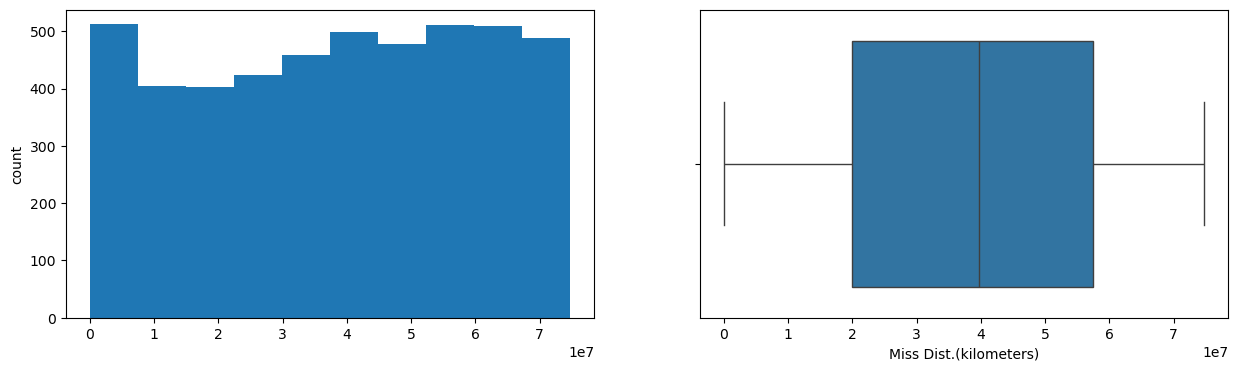

Miss Dist.(miles)


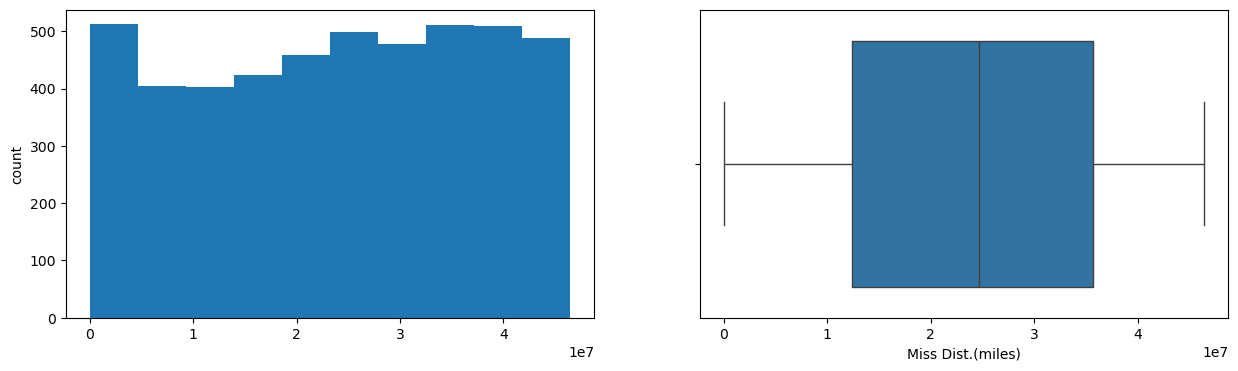

Orbiting Body


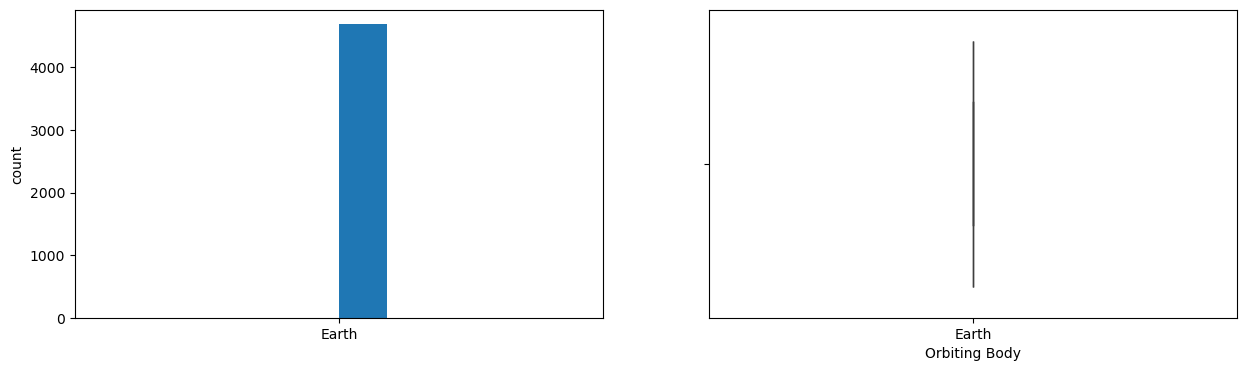

Orbit ID


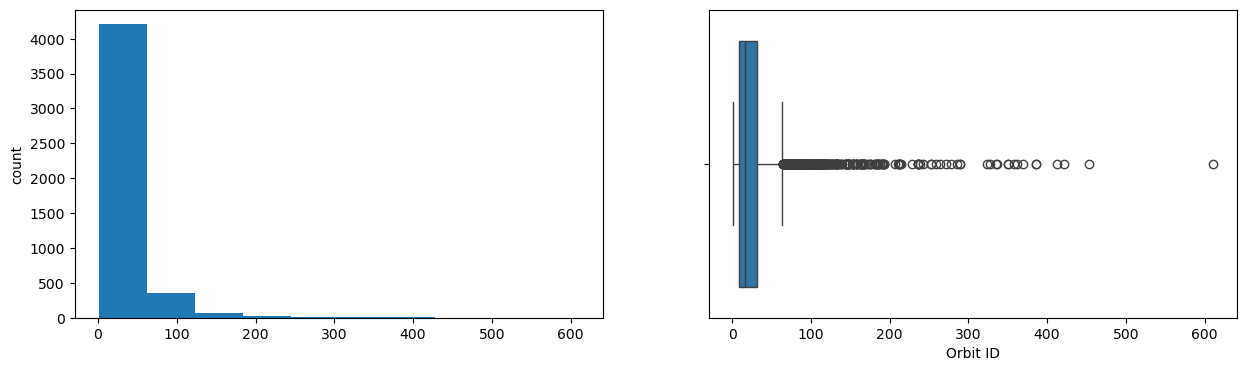

Orbit Determination Date


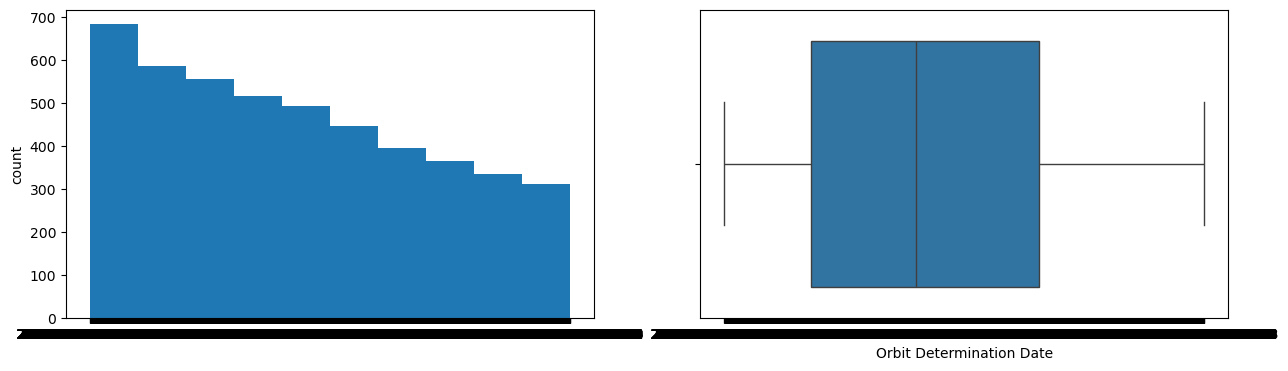

Orbit Uncertainity


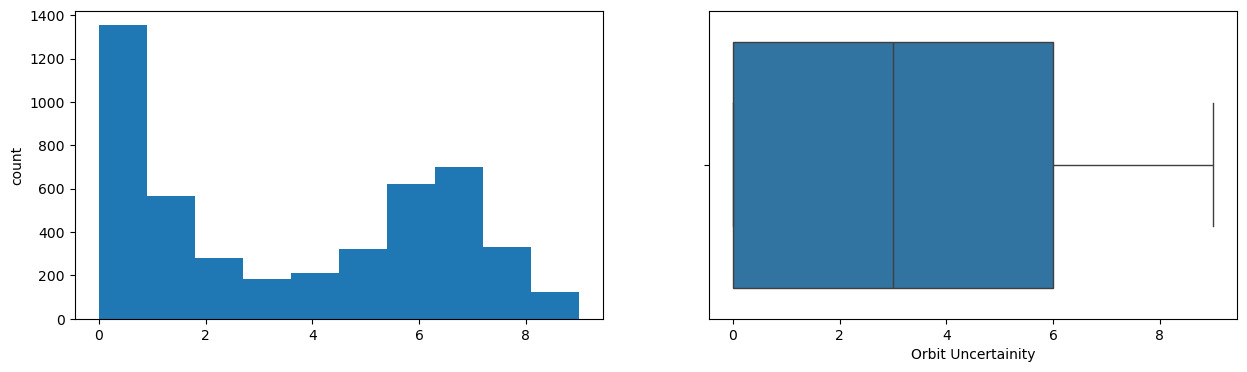

Minimum Orbit Intersection


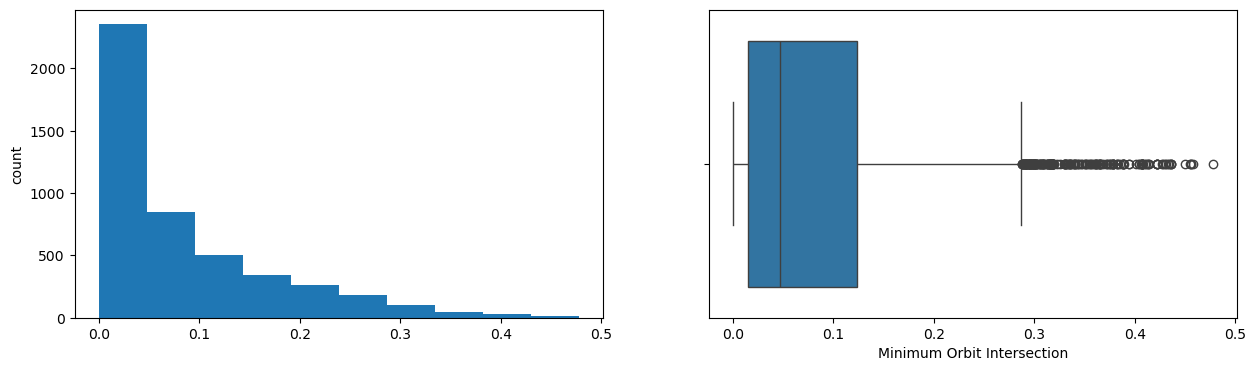

Jupiter Tisserand Invariant


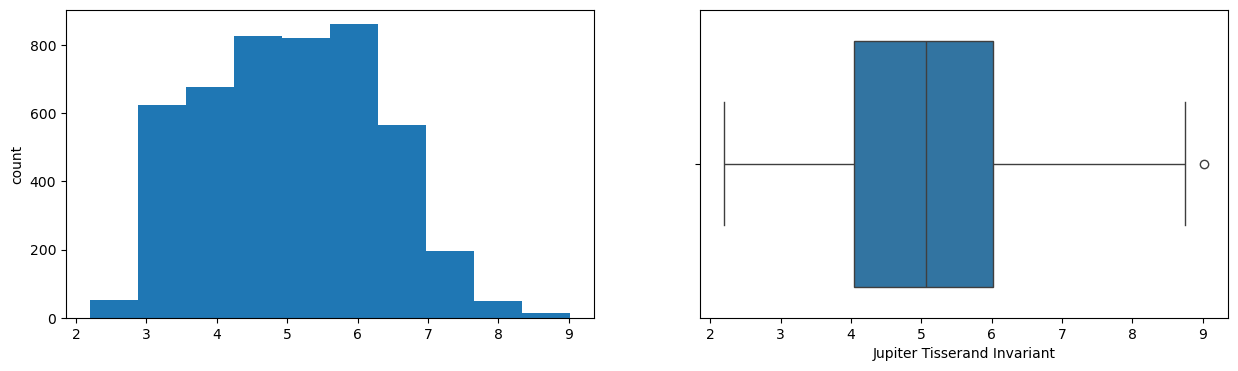

Epoch Osculation


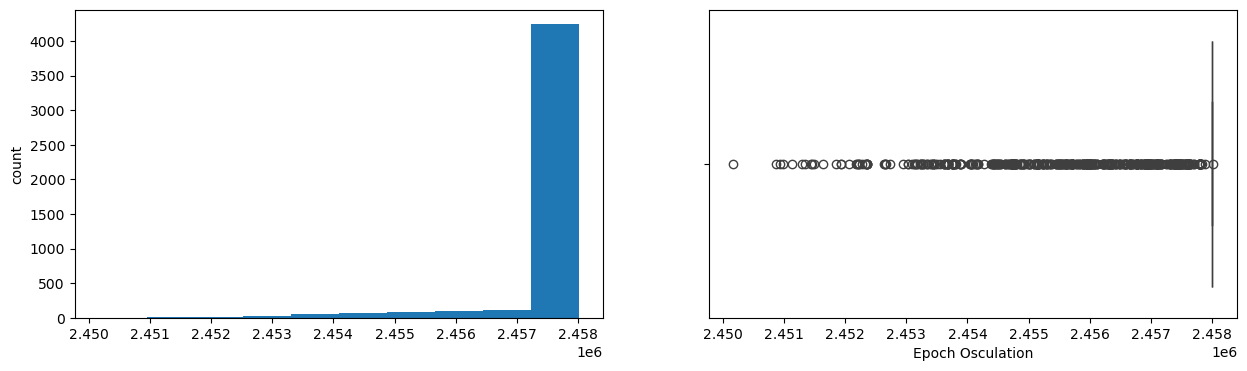

Eccentricity


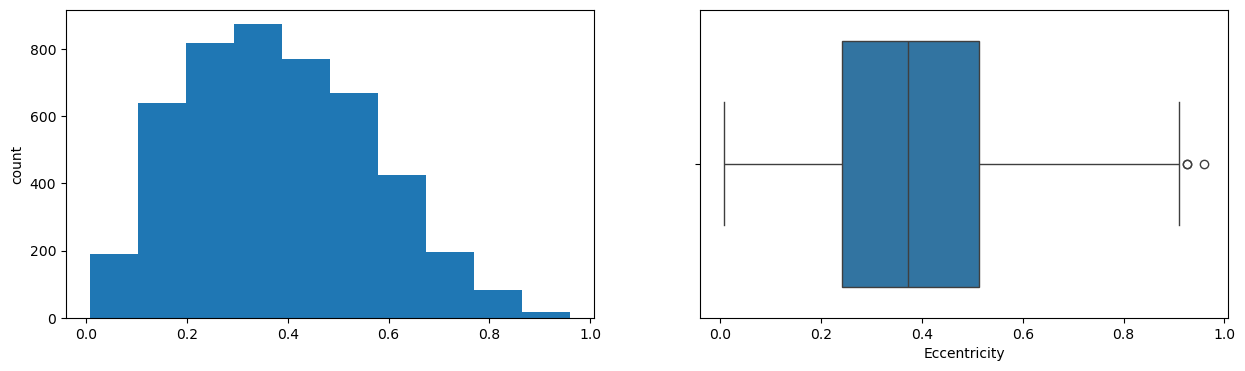

Semi Major Axis


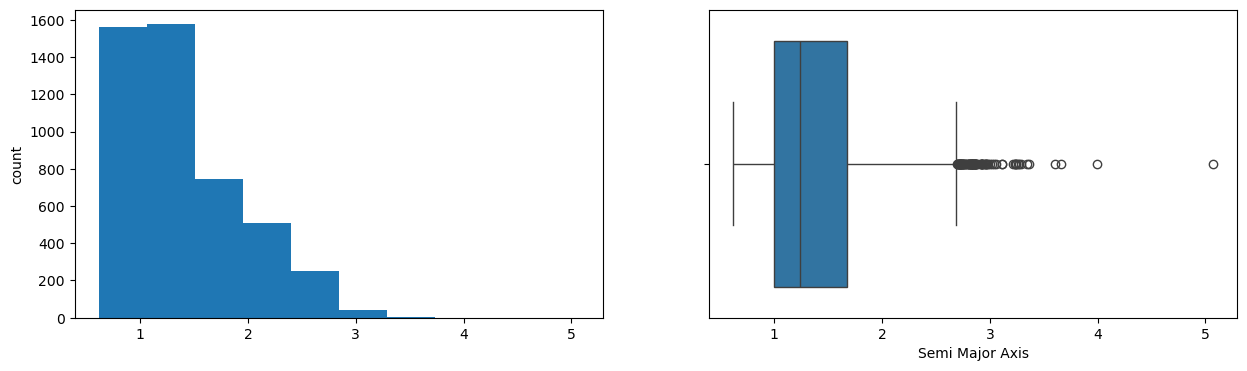

Inclination


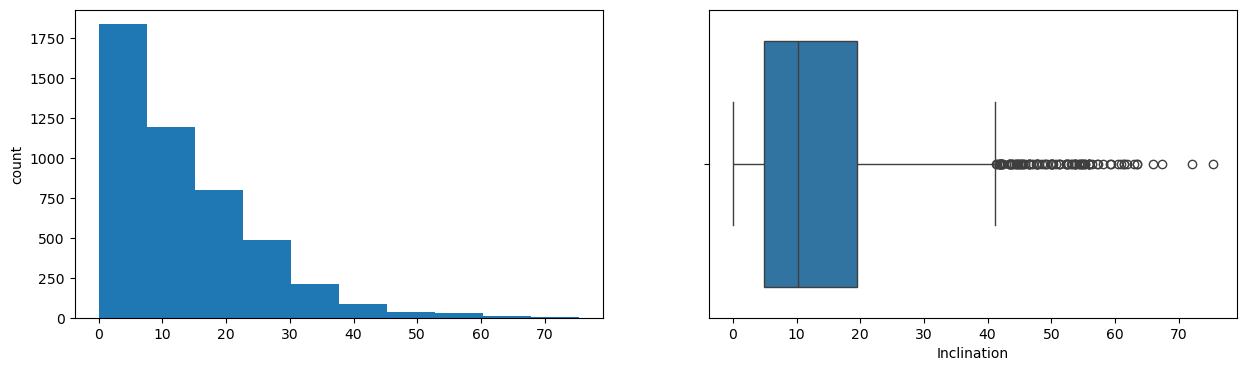

Asc Node Longitude


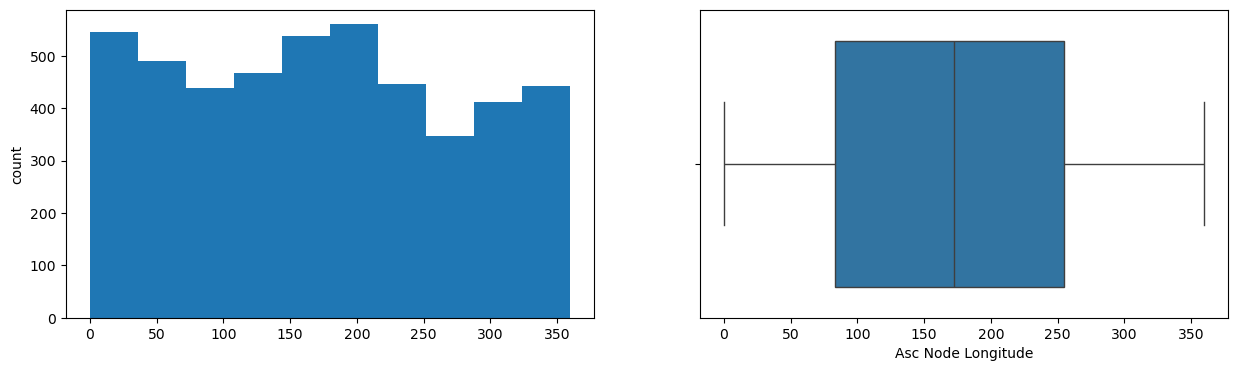

Orbital Period


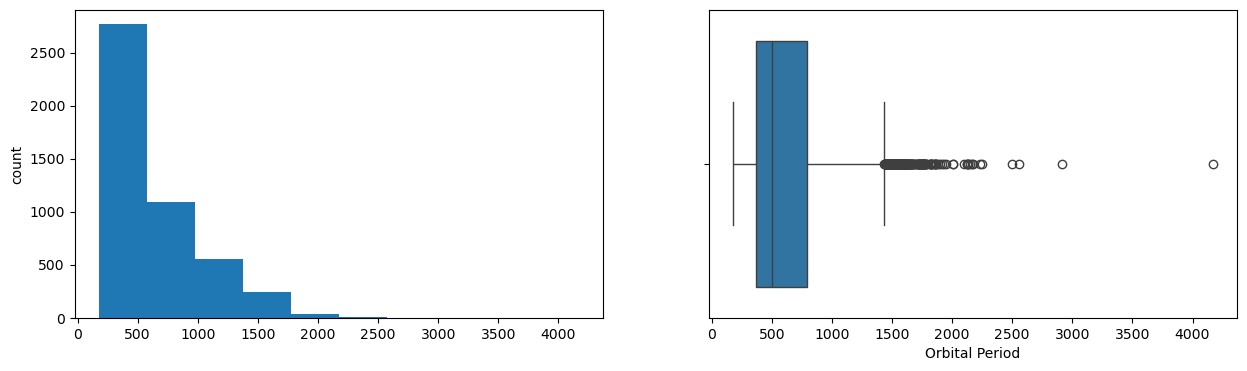

Perihelion Distance


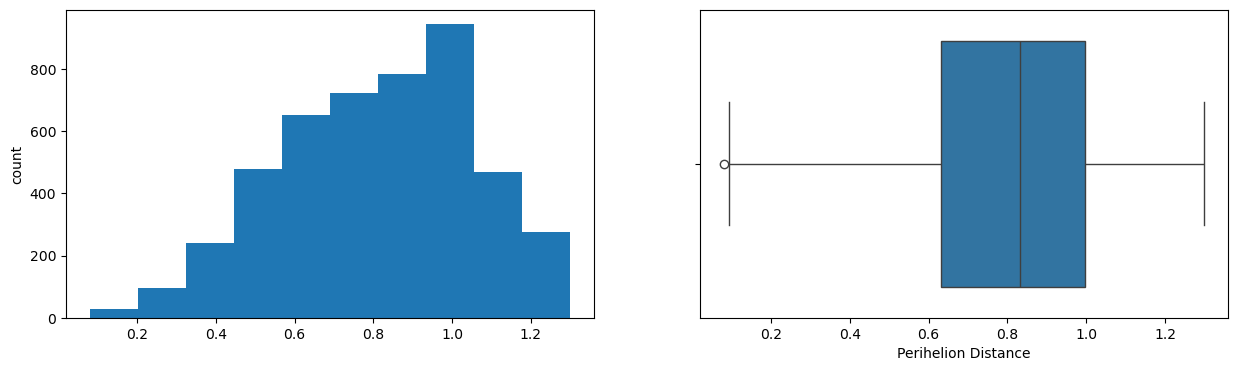

Perihelion Arg


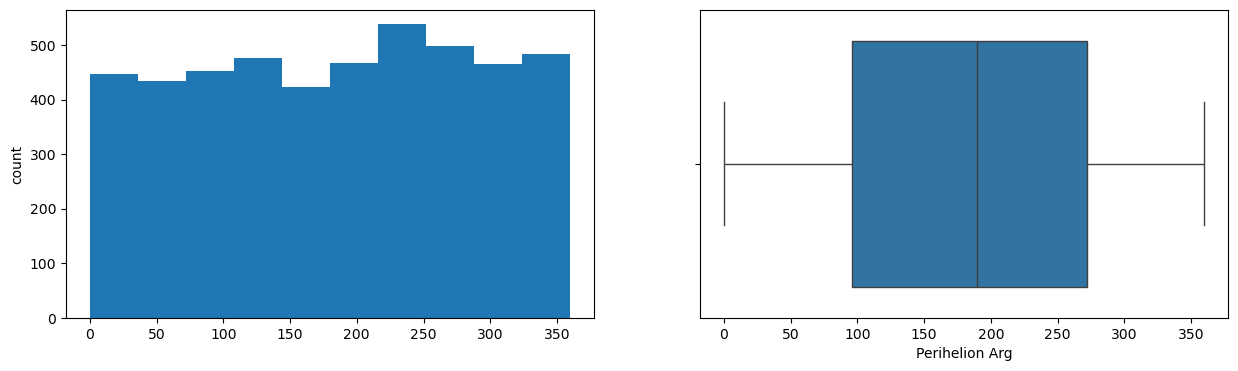

Aphelion Dist


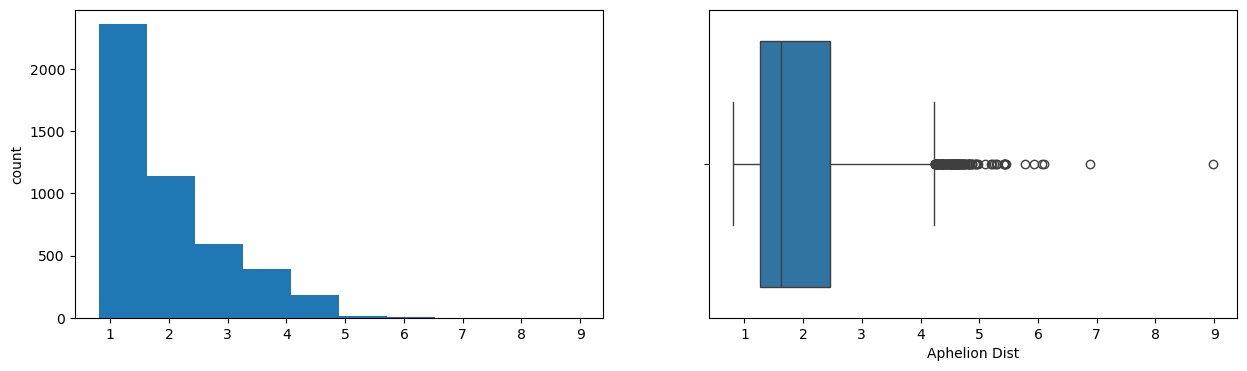

Perihelion Time


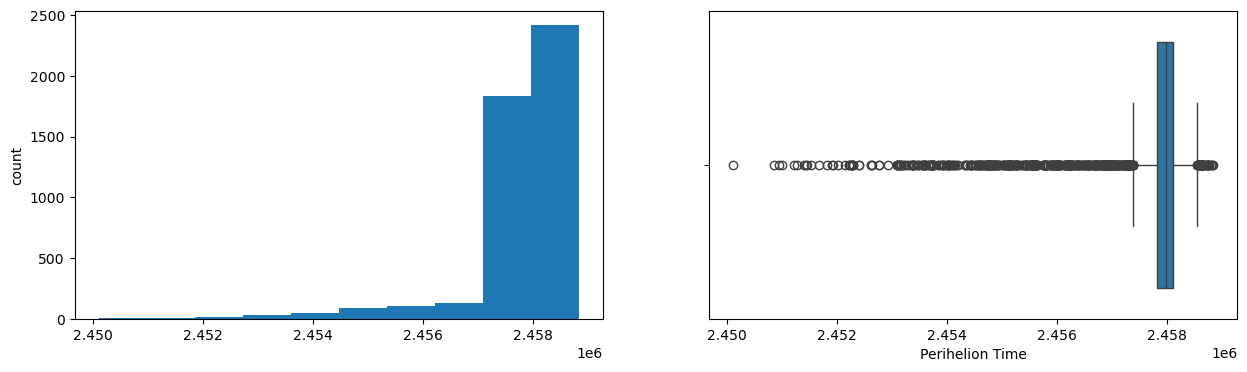

Mean Anomaly


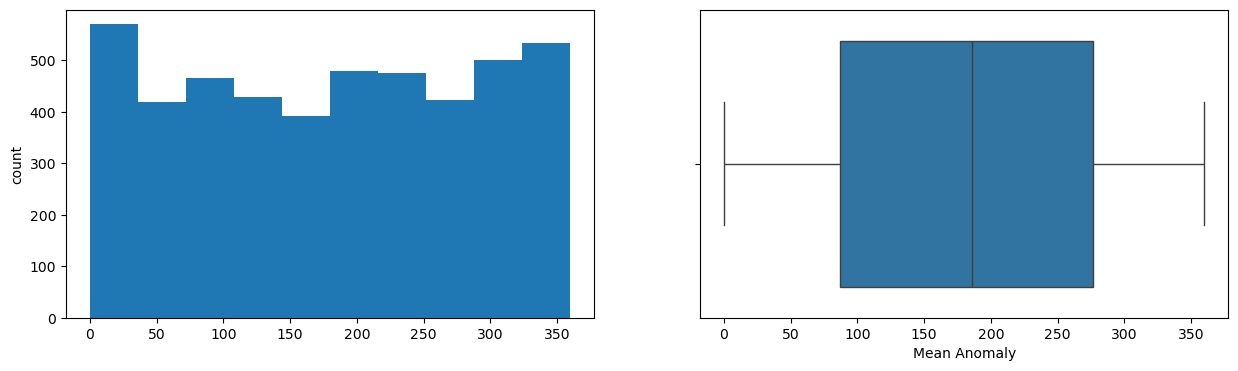

Mean Motion


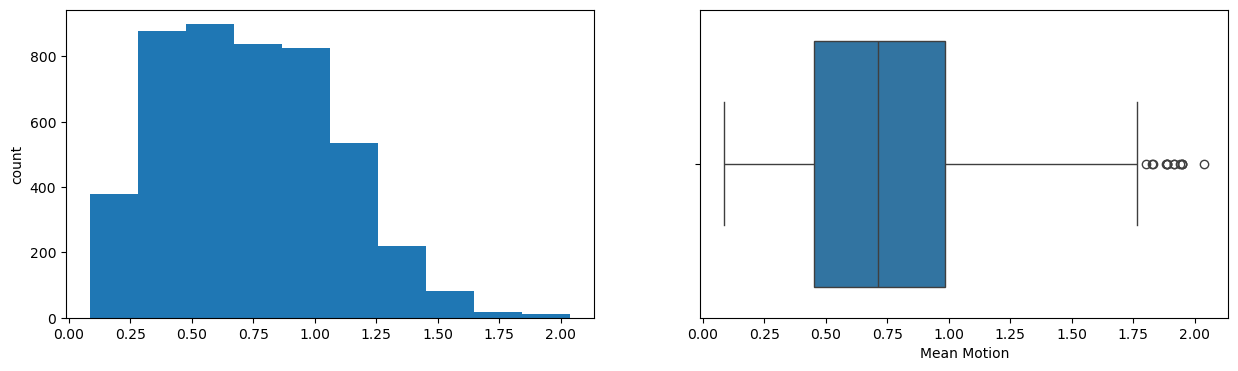

Equinox


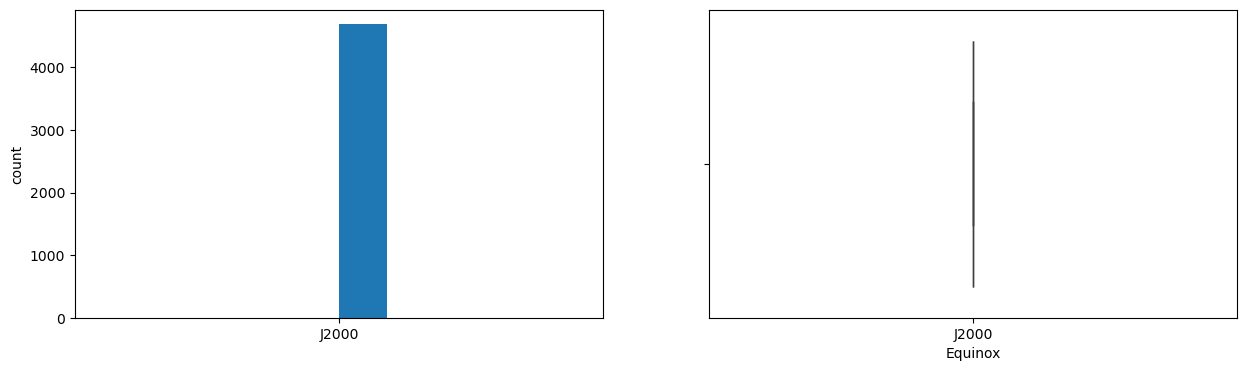

Hazardous


D:\ANACONDA\Lib\site-packages\matplotlib\axes\_axes.py:6862: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

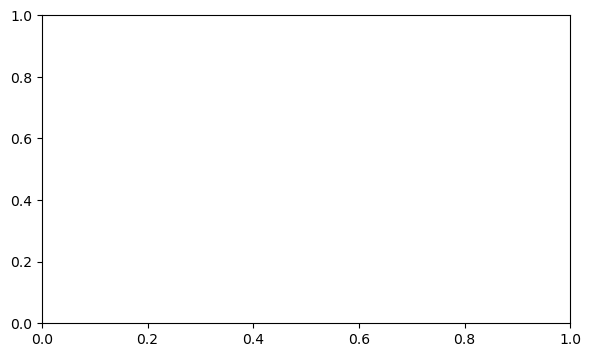

In [21]:
# Visualize the distribution and outliers before removing them
for col in df:
    print(col)
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [25]:
# Remove outliers using IQR method
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

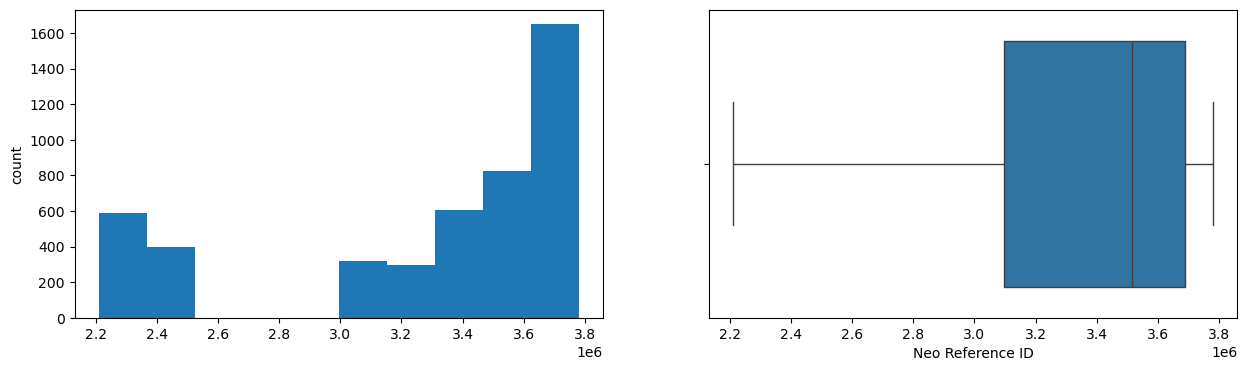

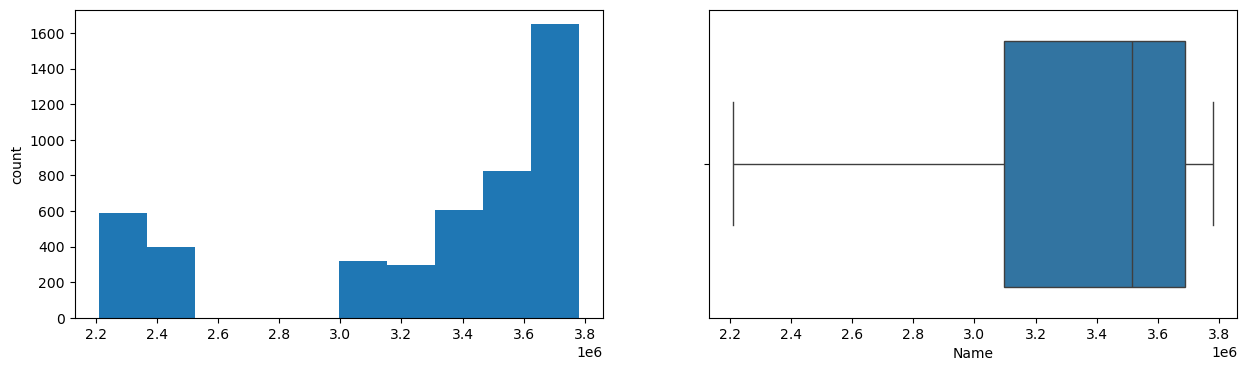

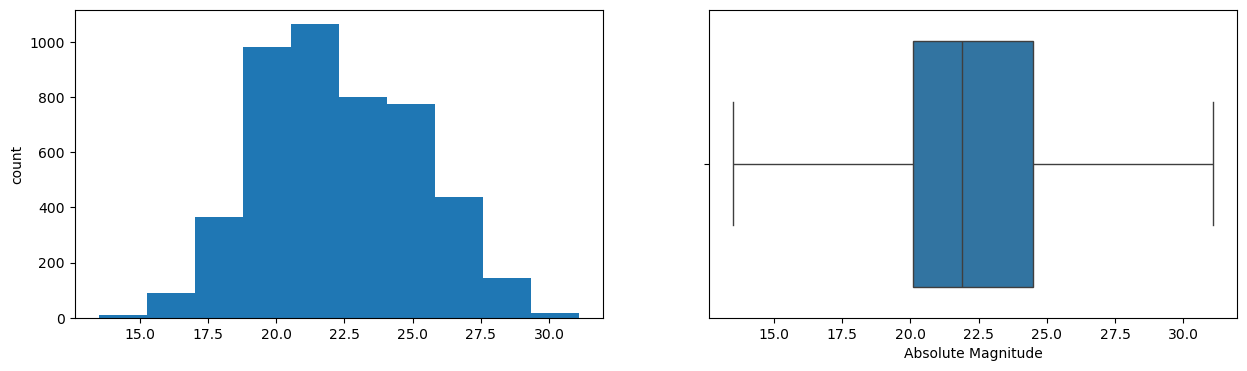

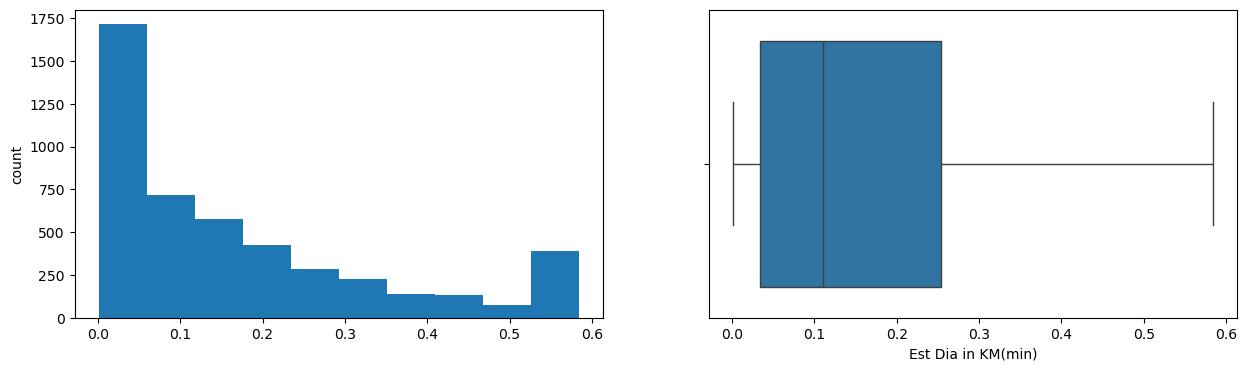

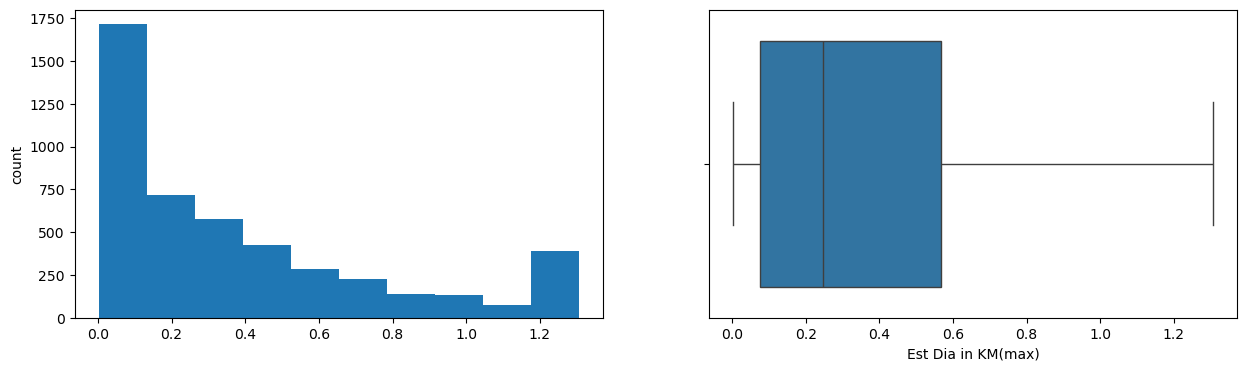

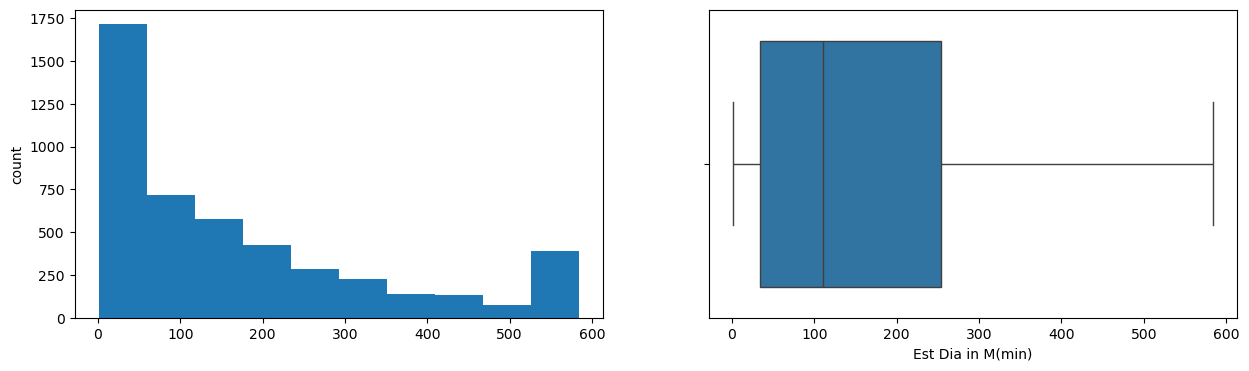

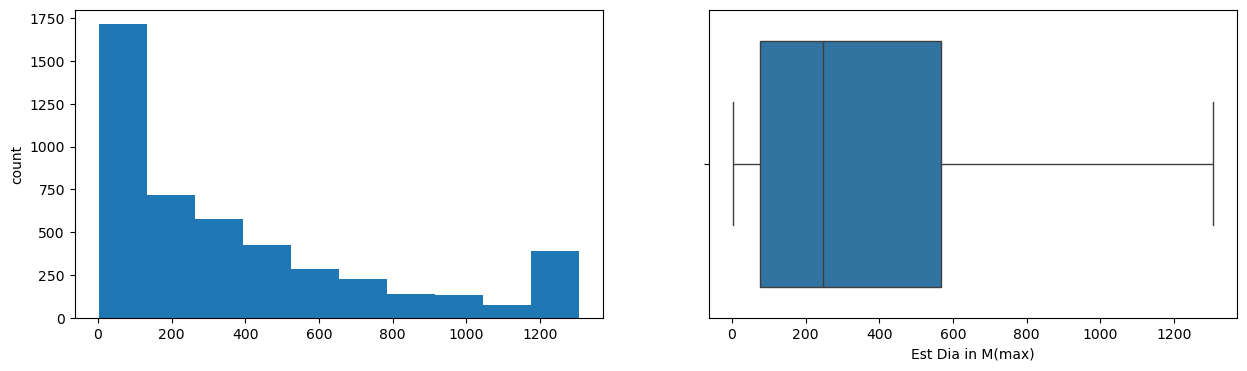

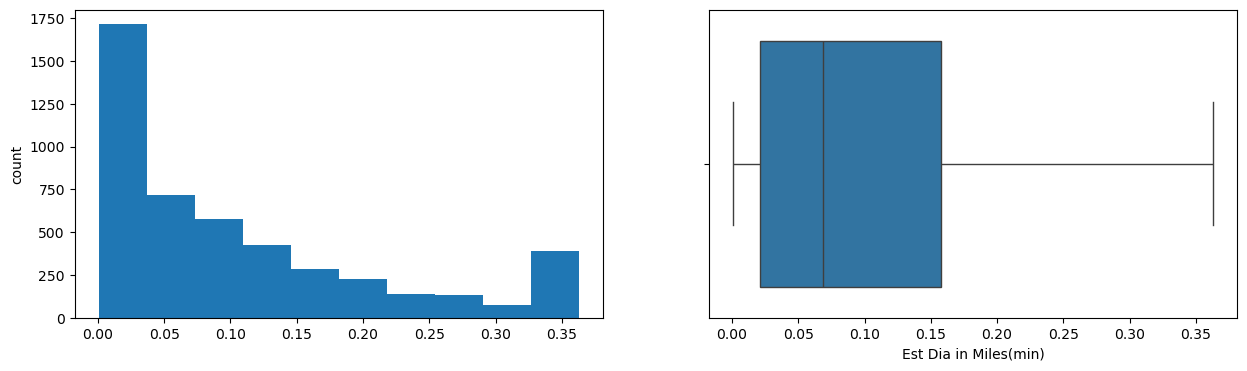

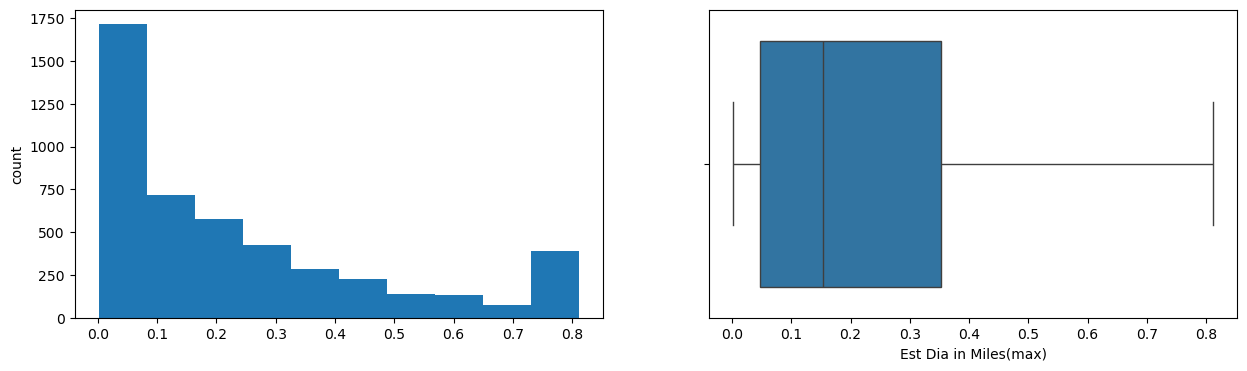

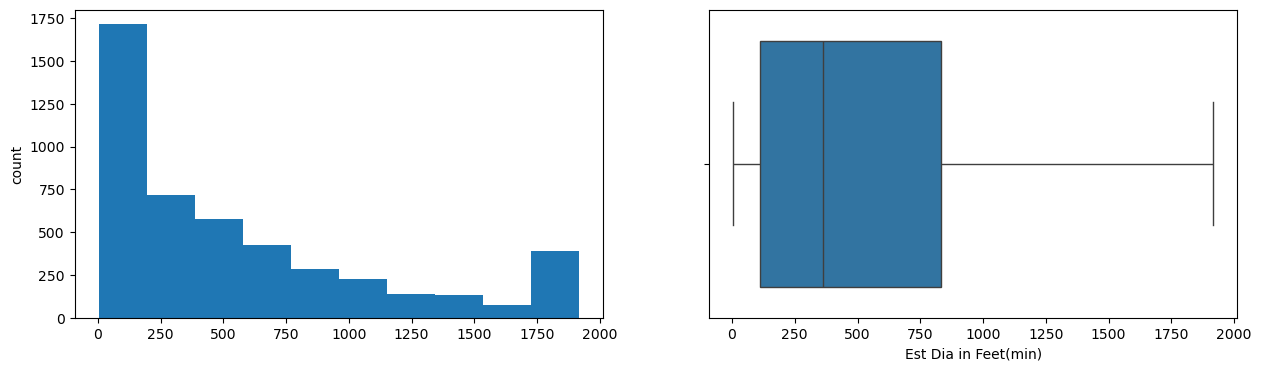

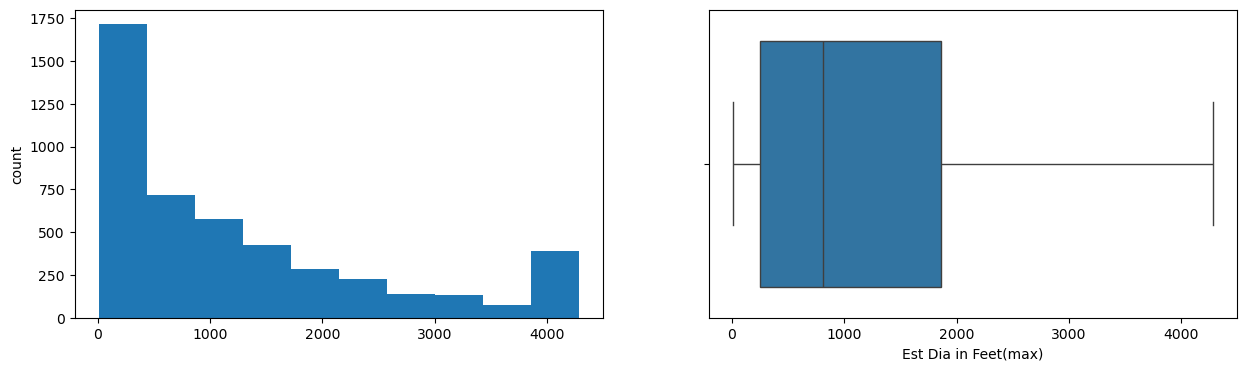

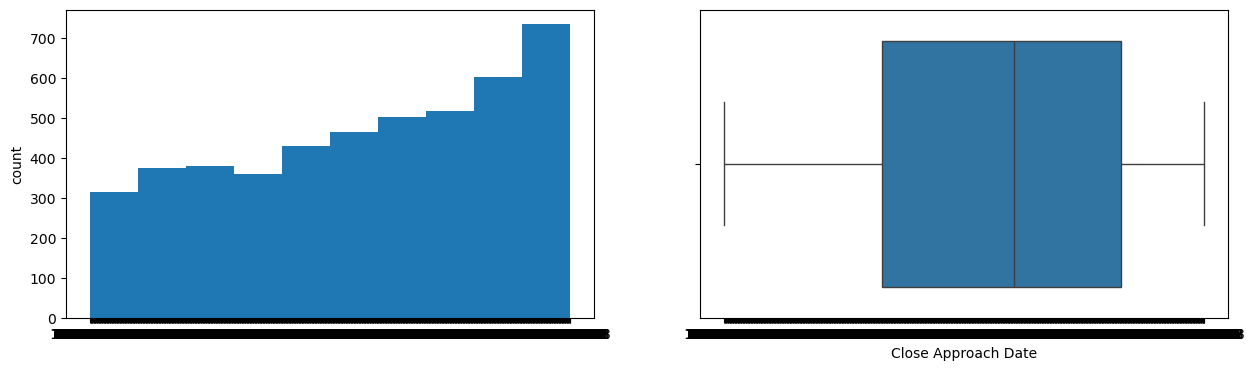

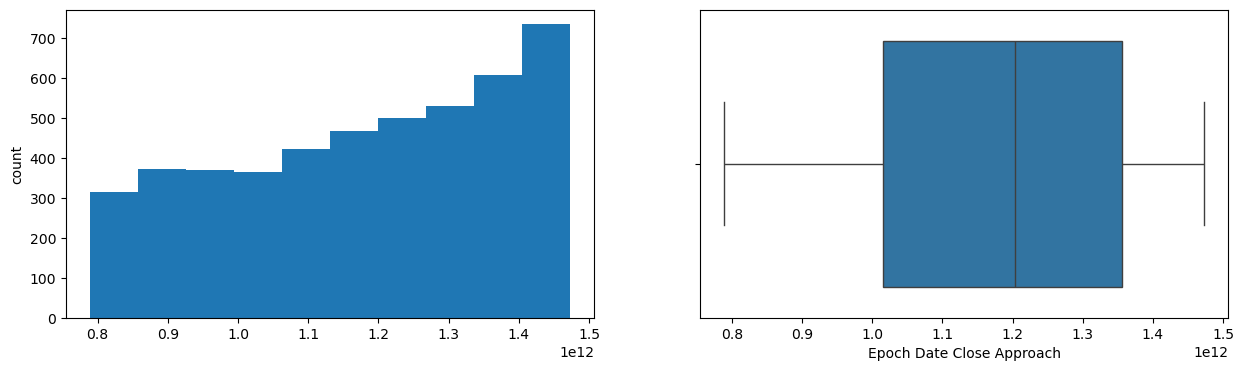

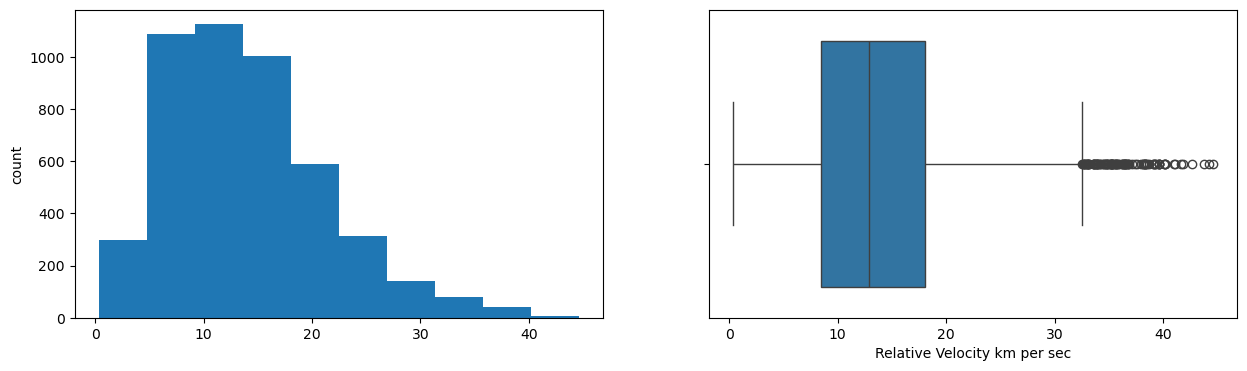

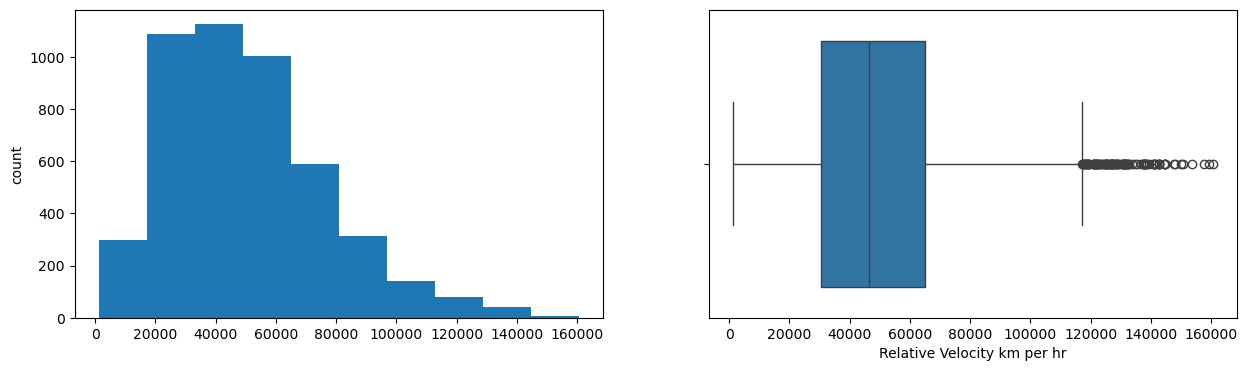

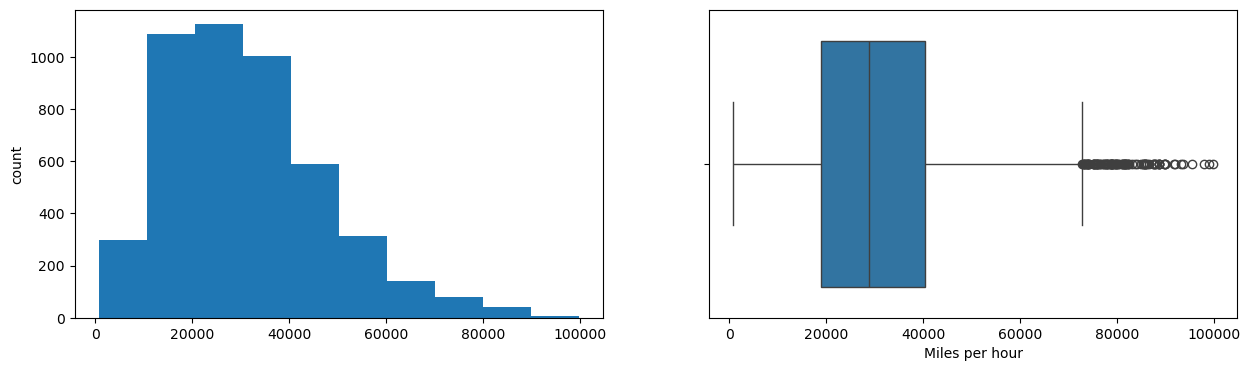

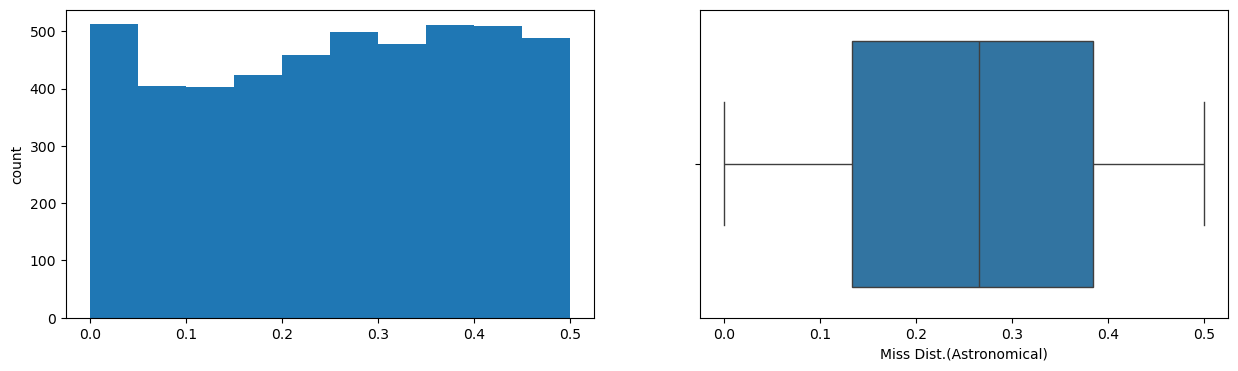

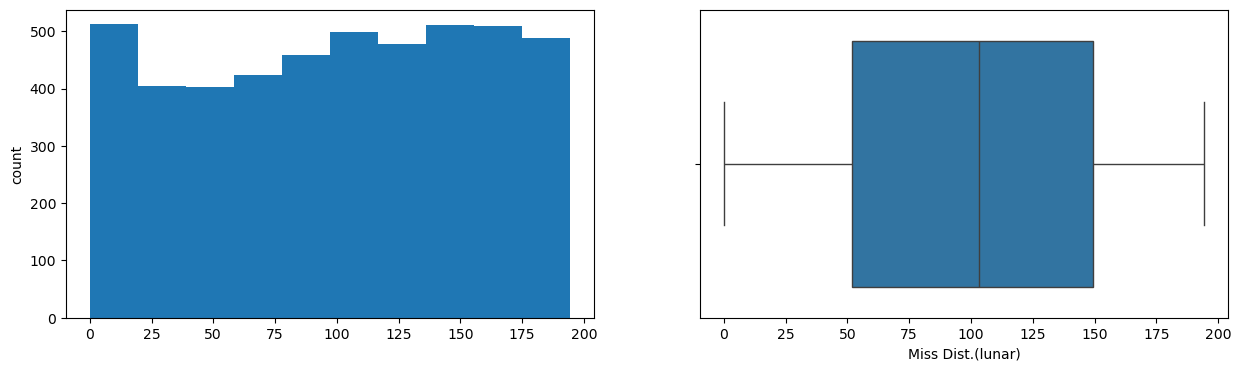

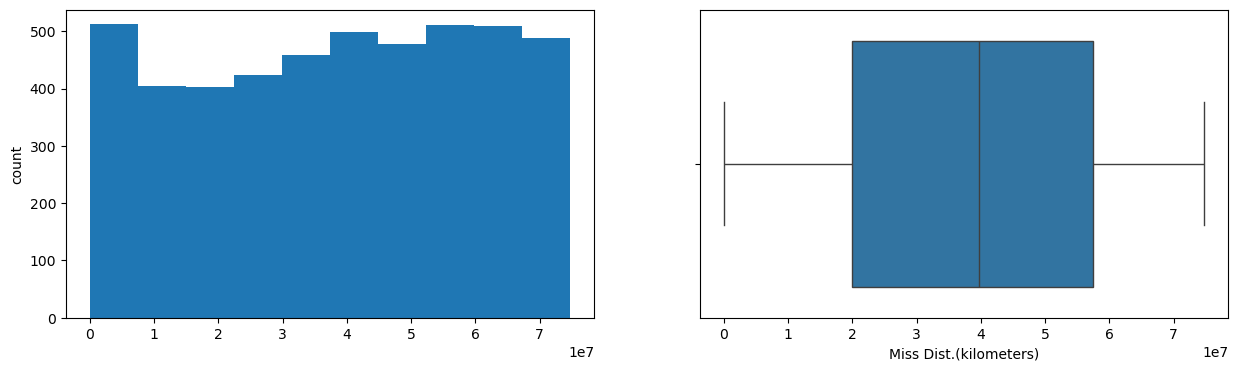

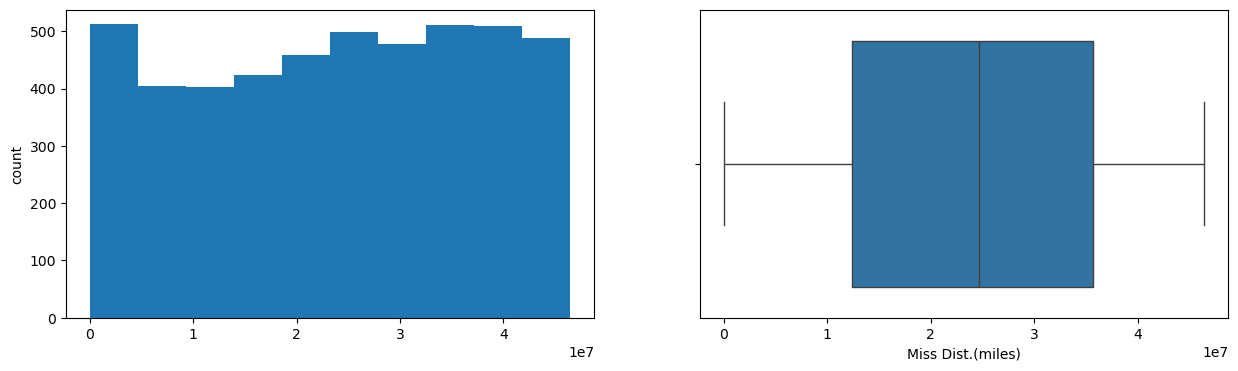

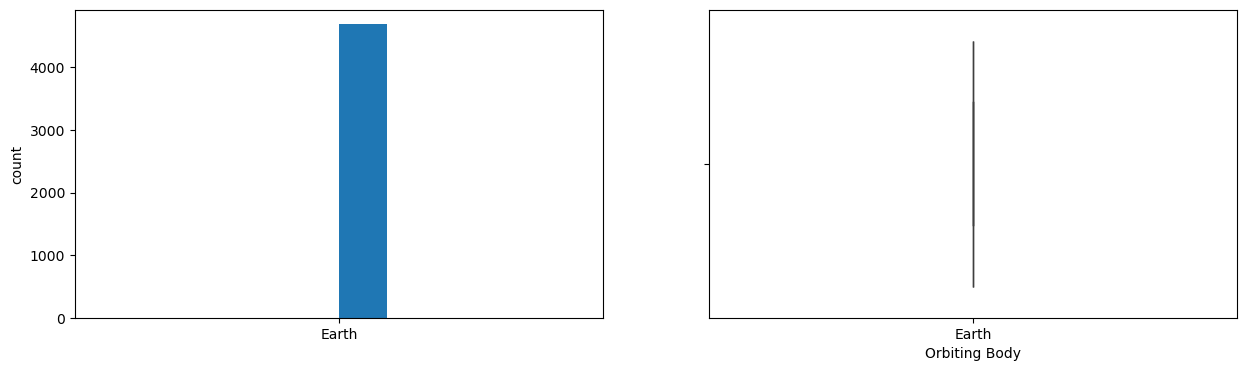

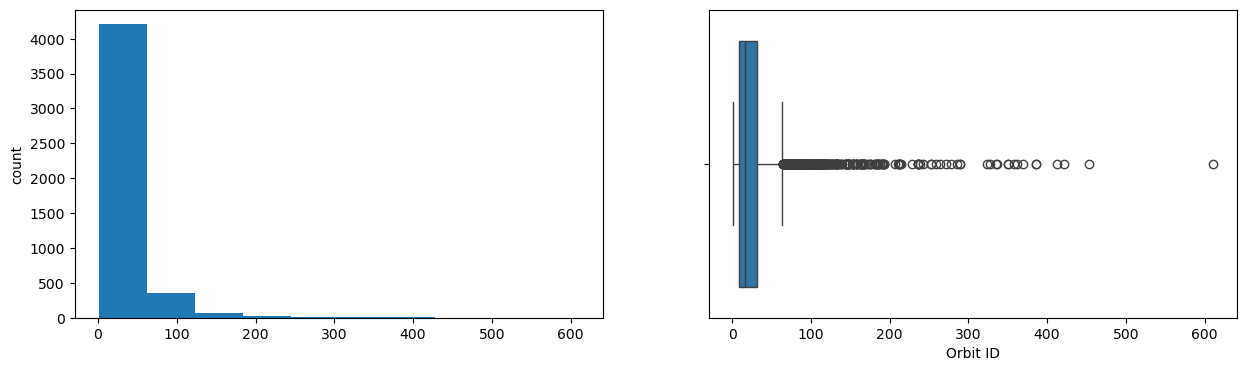

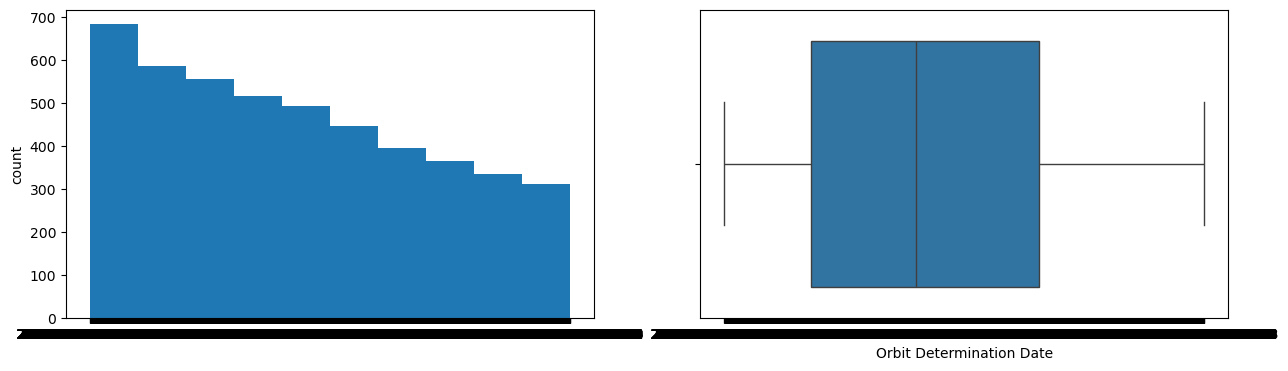

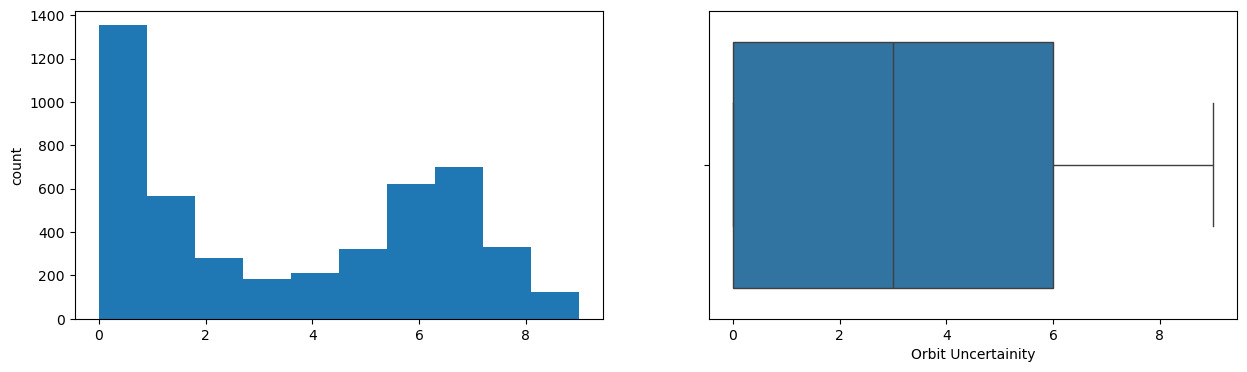

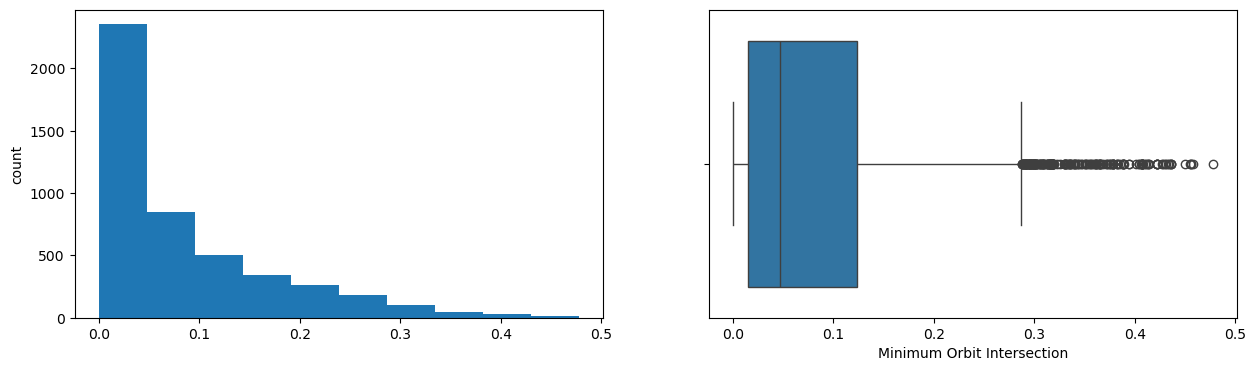

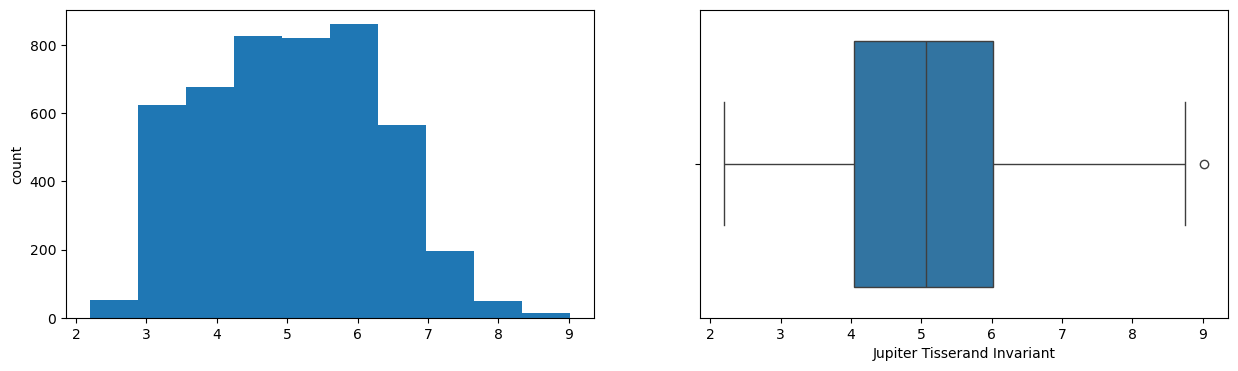

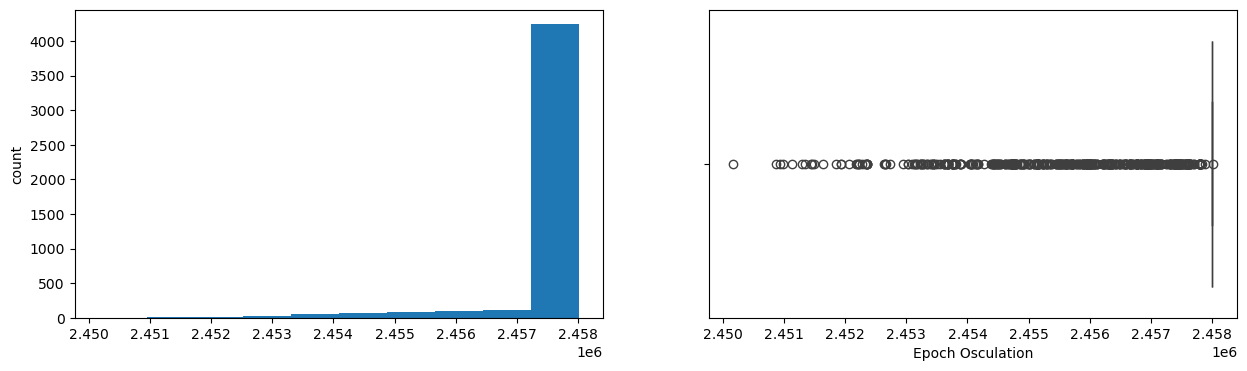

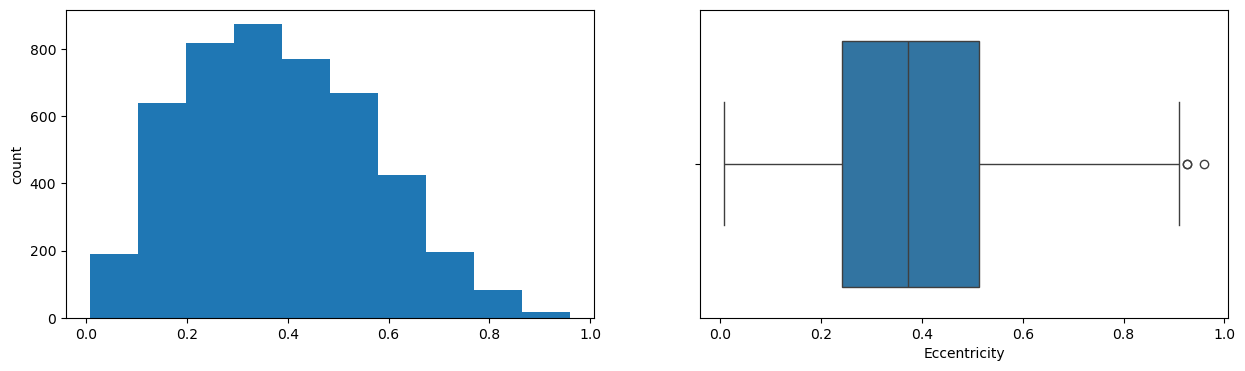

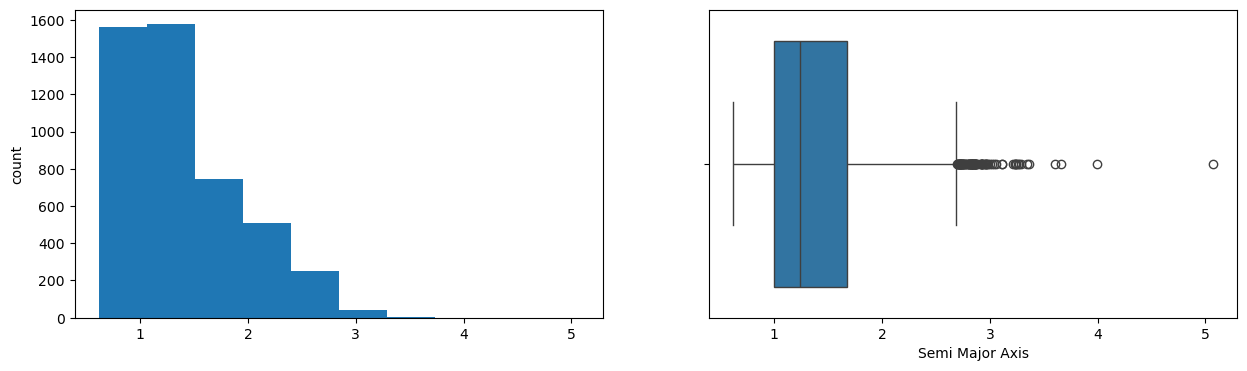

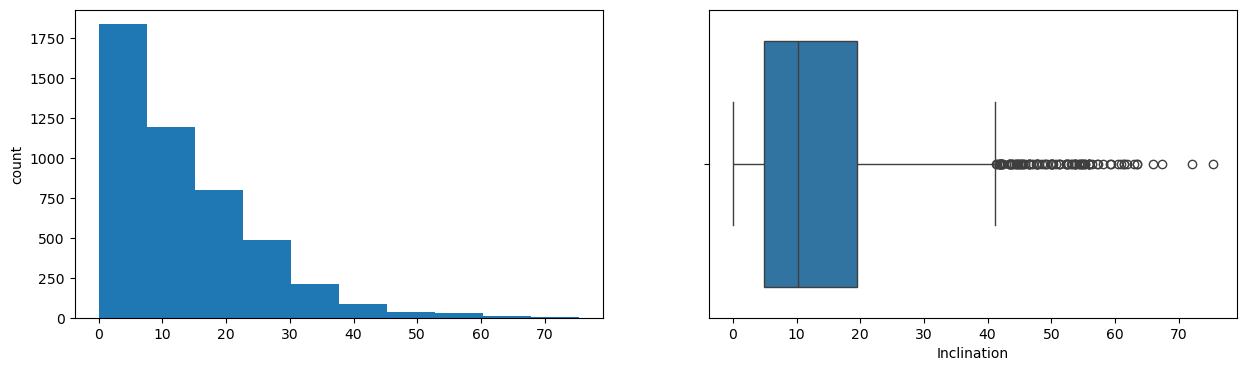

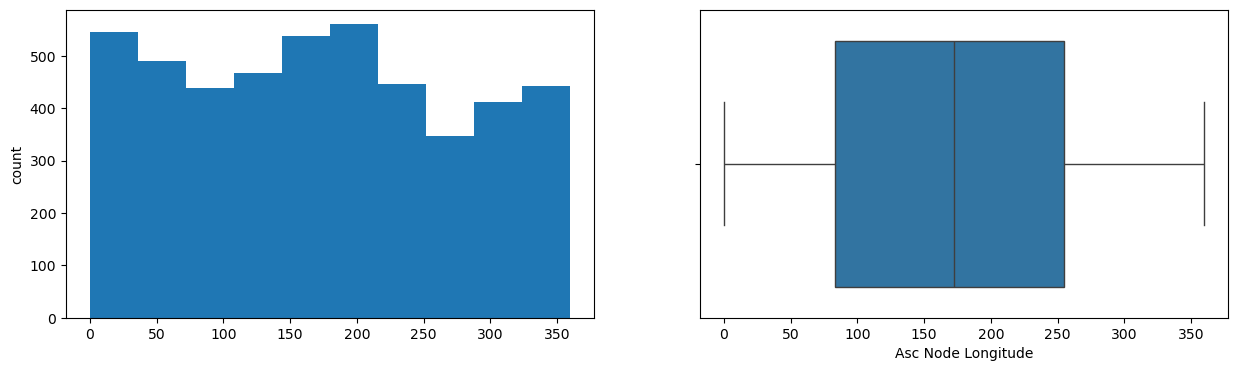

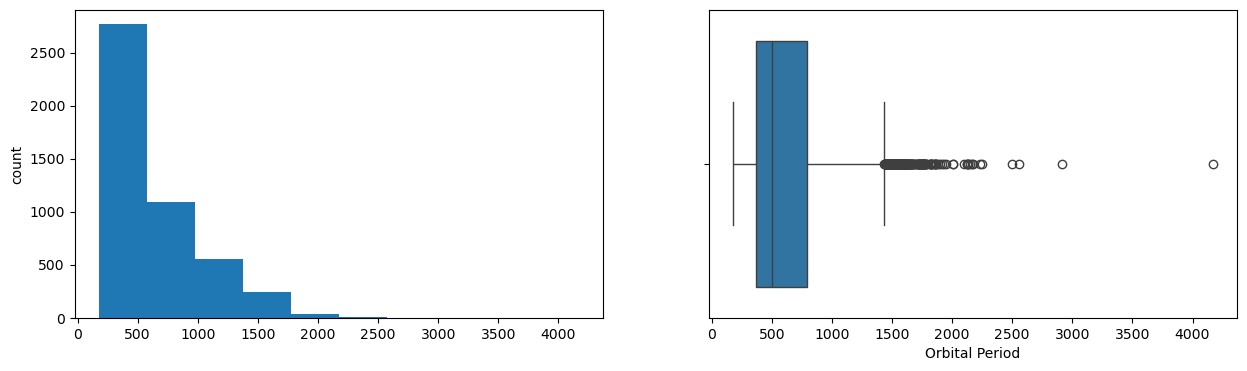

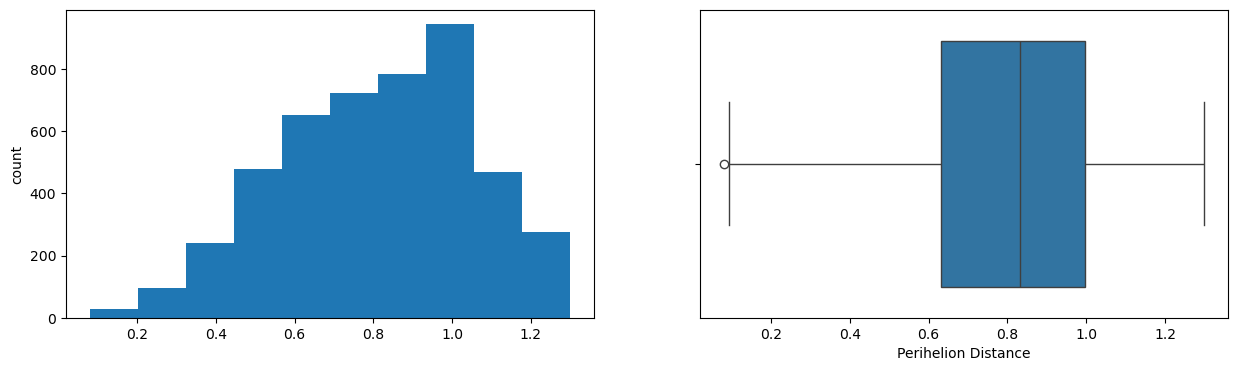

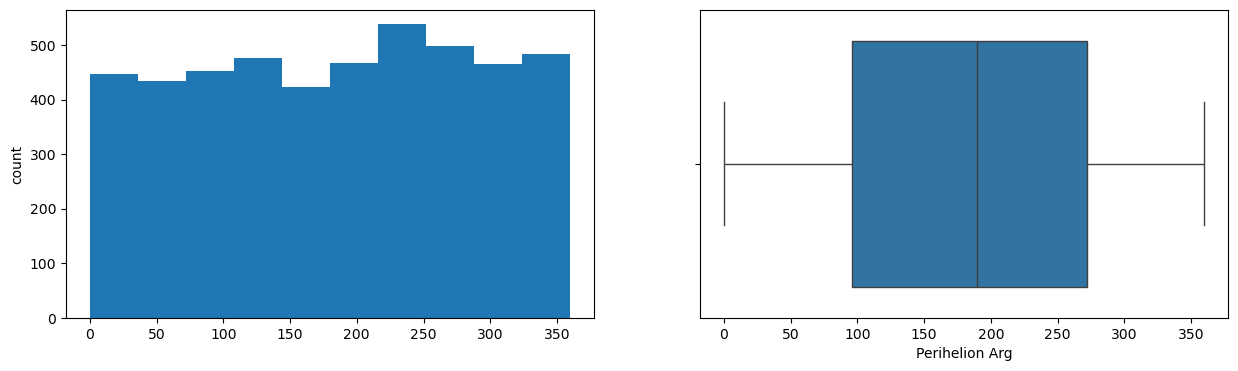

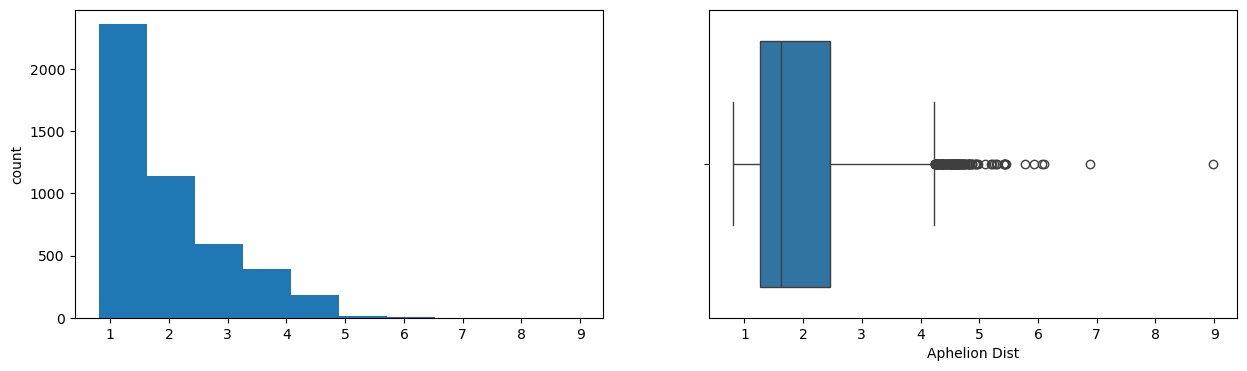

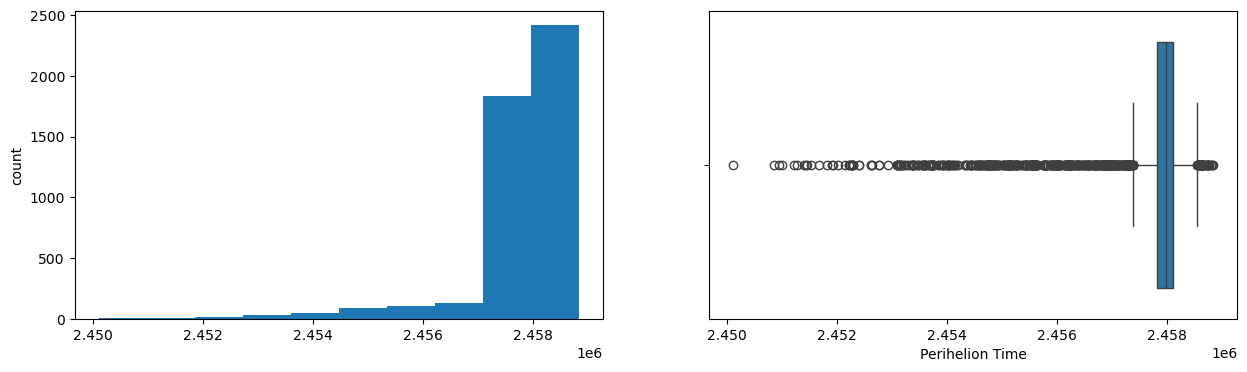

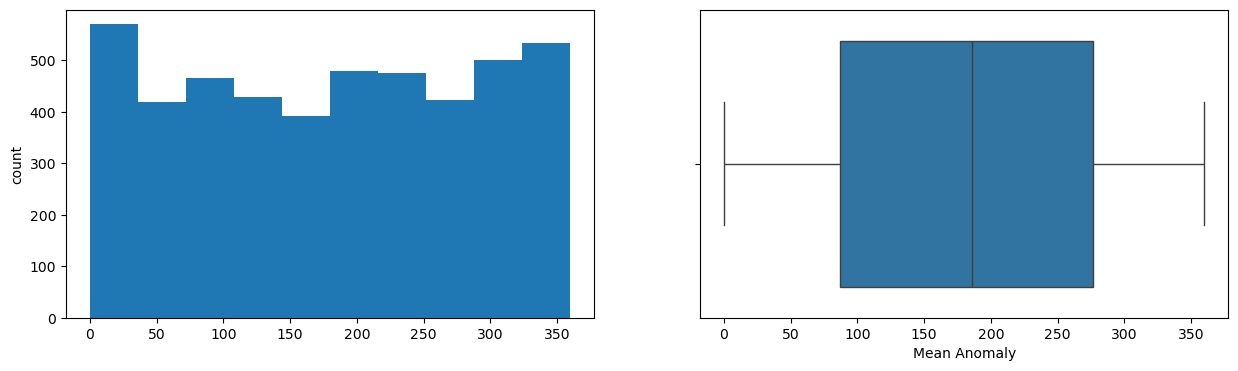

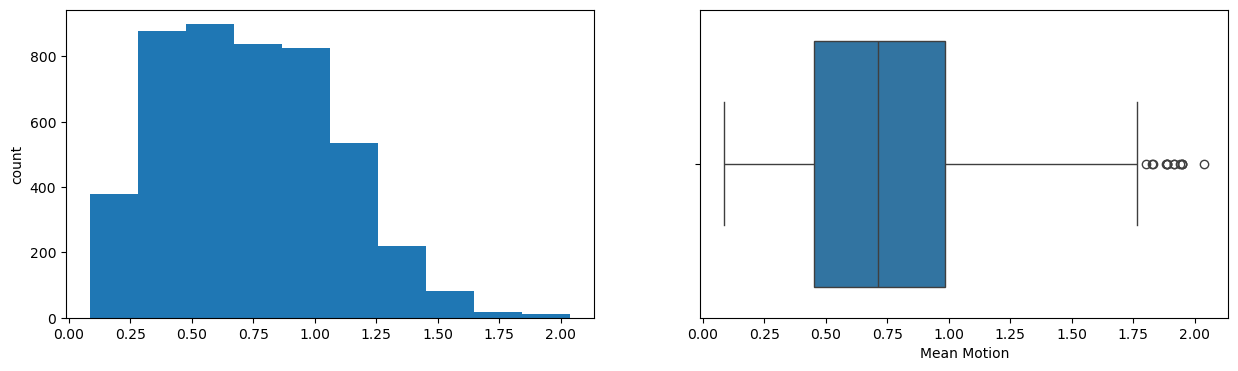

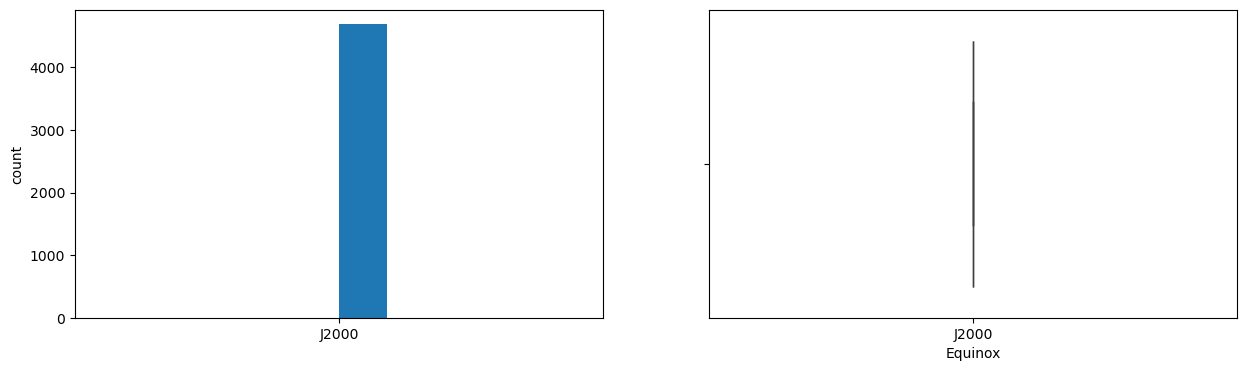

D:\ANACONDA\Lib\site-packages\matplotlib\axes\_axes.py:6862: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

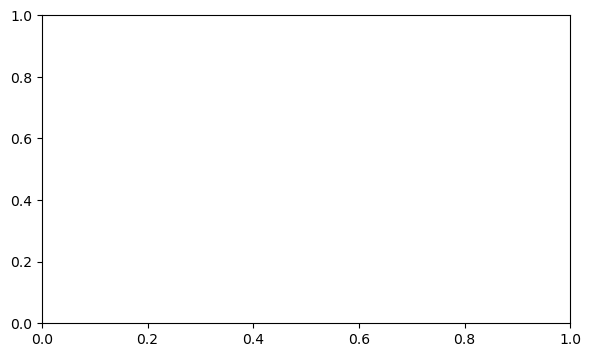

In [27]:
# Visualize the distribution and outliers after removing them
for col in df:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [29]:
import pandas as pd
import numpy as np

def handle_outliers_iqr(df, column_name):
  """Handles outliers in a specified column using IQR method.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to process.

  Returns:
    The DataFrame with outliers capped and removed.
  """

  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap outliers
  df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

  # Remove extreme outliers
  df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

  return df

# Example usage:
data = {'column1': [1, 2, 3, 4, 5, 100, -10]}
df = pd.DataFrame(data)

df = handle_outliers_iqr(df, 'column1')
print(df)


   column1
0        1
1        2
2        3
3        4
4        5
5        9
6       -3


In [15]:
obj=LabelEncoder()

In [ ]:
obj.fit(

In [ ]:
# Generate a synthetic binary classification dataset
x, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = Standcaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
y_test


array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

In [49]:
import pandas as pd
df=pd.DataFrame(x,y)

In [51]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,0.829274,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643
0,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,0.543479,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363
1,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,-0.549925,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212
1,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,-0.241431,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199
0,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,-0.695695,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,-1.029972,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325
1,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,0.956549,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333
1,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,0.858663,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119
0,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,-0.451375,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275


In [53]:
df.shape

(1000, 20)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [3]:
history = model.fit(x_train, y_train, epochs=13, batch_size=32, validation_split=0.2)

NameError: name 'model' is not defined

In [1]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Testd Loss: {test_loss}")
print(f"Testd Accuracy: {test_accuracy}")


NameError: name 'model' is not defined

In [6]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

In [ ]:
plt.xlabel('Epoch')

In [ ]:
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()